In [1]:
#Researh Project

This is the project for the implementation of the placement of EV charging stations in Montreal. 
Main goal is to check ideal placement of EV stations in public places like hotels, shopping centres, 
restaurants, bar, department stores and Movie theaters. 

In [2]:
#Install libraries

In [3]:
#pip install pgeocode
#pip install geopy
#pip install geocoder
#pip install folium

In [4]:
#Importing Libraries 

For data preprocessing, analytics and visualization

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns

For k-means clustering

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans 

For plotting chart

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

For using mean, median and mode 

In [8]:
from scipy import stats    # using mode from here (numpy ndarray cannot use mode directly)

For converting longitude and latitude value to postal code and get useful information about the area

In [9]:
import pgeocode
import geopy
import geocoder

In [10]:
#Fetching dataset

Using all three datasets to figure out where the charging stations will be beneficial to install

In [11]:
census_dataset = pd.read_excel('Census2016_Montreal.xls')
montreal_dataset = pd.read_csv('GreaterMontreal_ 121220.csv', encoding = "ISO-8859-1")
points_of_interest_dataset = pd.read_excel('PointsOfInterest_MontrealFinal_Updated.xls')

In [12]:
points_of_interest_dataset

,POI_ID,NAME,ADDRESS,CITY,PROV,POST_CODE,PHONE,X,Y,CATEGORY
0,POI10004697,RESTAURANT ALADDIN,6700 CH DE LA CÃƒÆ’Ã‚â€TE DES NEIGES,MONTREAL,QC,H3S 2B2,514-342-7808,-73.637063,45.502503,Restaurants
1,POI10014792,PIZZERIA SAINT-DENIS,1617 RUE SAINT DENIS,MONTREAL,QC,H2X 3K3,514-281-6669,-73.562842,45.515012,Restaurants
2,POI10014794,TIFFANY CASINO,3775 BOUL INDUSTRIEL,MONTREAL,QC,H1H 2Y8,514-328-0080,-73.633118,45.580402,Amusement and Recreation Services
3,POI10014903,EL TACO DEL TABARNACO,916 AV DULUTH E,MONTREAL,QC,H2L 1B6,514-528-9865,-73.573235,45.523408,Restaurants
4,POI10014917,EL DIONELLI,5600 RUE DE SALABERRY,MONTREAL,QC,H4J 1J7,514-332-8999,-73.710948,45.528730,Restaurants
...,...,...,...,...,...,...,...,...,...,...
4680,POI85872,RESTAURANT PIZZERIA SANDHU,4548 AV PAPINEAU,MONTREAL,QC,H2H 1V3,514-524-8685,-73.575604,45.533146,Restaurants
4681,POI96916,HÃƒÆ’Ã‚â€TEL LA RÃ‰SIDENCE DU VOYAGEUR,847 RUE SHERBROOKE E,MONTREAL,QC,H2L 1K6,514-527-9515,-73.566512,45.519761,Hotels
4682,POI98943,PICASSO SERRE,6810 RUE SAINT JACQUES,MONTREAL,QC,H4B 1V8,514-484-2832,-73.627736,45.457981,Restaurants
4683,POI99080,HOTEL RITZ-CARLTON MONTREAL,1228 RUE SHERBROOKE O,MONTREAL,QC,H3G 1H6,514-842-4212,-73.578030,45.500217,Hotels


In [13]:
#Data Analytics and Viusalization

No need to merge datasets already indicated by Binod

In [14]:
census_dataset

,FID,City,Metropolitan Area,Subregion,Prov,X,Y,2016 Population,2016 Dwelling Count,2016 Occupied Dwelling Count,Area (sq. km)
0,1669,Mirabel,Communauté Métropolitaine de Montréal,Mirabel,Quebec,-74.01211,45.66353,50513,20395,19631,994.845387
1,1717,Longueuil,Communauté Métropolitaine de Montréal,Longueuil,Quebec,-73.49604,45.54300,85721,34249,33257,92.228456
2,1720,Longueuil,Communauté Métropolitaine de Montréal,Longueuil,Quebec,-73.49604,45.54300,41671,17134,16888,144.089454
3,1721,Longueuil,Communauté Métropolitaine de Montréal,Longueuil,Quebec,-73.49604,45.54300,239700,110761,105533,235.667385
4,1722,Longueuil,Communauté Métropolitaine de Montréal,Longueuil,Quebec,-73.49604,45.54300,26394,10418,10243,89.449089
5,1728,L'Assomption,Communauté Métropolitaine de Montréal,L'Assomption,Quebec,-73.42399,45.83146,5913,2962,2878,4.751278
6,1731,L'Assomption,Communauté Métropolitaine de Montréal,L'Assomption,Quebec,-73.42399,45.83146,3439,1494,1435,74.937797
7,1732,L'Assomption,Communauté Métropolitaine de Montréal,L'Assomption,Quebec,-73.42399,45.83146,84285,33876,33321,127.932585
8,1733,L'Assomption,Communauté Métropolitaine de Montréal,L'Assomption,Quebec,-73.42399,45.83146,22429,8932,8736,207.825104
9,1734,L'Assomption,Communauté Métropolitaine de Montréal,L'Assomption,Quebec,-73.42399,45.83146,5493,2240,2166,4.908156


Checking for finding methods

In [15]:
census_dataset['City']

0            Mirabel
1          Longueuil
2          Longueuil
3          Longueuil
4          Longueuil
5       L'Assomption
6       L'Assomption
7       L'Assomption
8       L'Assomption
9       L'Assomption
10      L'Assomption
11         Longueuil
12          Montreal
13          Montreal
14          Montreal
15          Montreal
16          Montreal
17          Montreal
18          Montreal
19          Montreal
20          Montreal
21          Montreal
22          Montreal
23          Montreal
24          Montreal
25          Montreal
26          Montreal
27    Deux-Montagnes
28             Laval
29          Montreal
30    Deux-Montagnes
31    Deux-Montagnes
32    Deux-Montagnes
33    Deux-Montagnes
34    Deux-Montagnes
35    Deux-Montagnes
36    Deux-Montagnes
Name: City, dtype: object

In [16]:
census_dataset['City'].unique()

array(['Mirabel', 'Longueuil', "L'Assomption", 'Montreal',
       'Deux-Montagnes', 'Laval'], dtype=object)

There any many Montreal named values, some of them are gibberish (used special characters), and many values have uppercase and lowercase characters

In [17]:
montreal_dataset['City'].unique()

array(['MontrÃ©al', 'Pointe-aux-Trembles', 'MontrÃ©al-Est', 'Montreal',
       'MontrÃ©al-Nord', 'Anjou', 'Outremont', 'St-LÃ©onard',
       'Montrâ\x88\x9aÂ©al', 'Saint-LÃ©onard', 'Ville-Marie', 'Verdun',
       'Ile des Soeurs', 'Mont-Royal', 'Mount-Royal', 'Ville Mont-Royal',
       'Westmount', 'Saint-Laurent', 'Ville St-Laurent', 'St-Laurent',
       'Saint Laurent', 'Ville St Laurent', 'CÃ´te-Saint-Luc',
       'Montreal-West', 'Dorval', 'Laval', 'LaSalle', 'Lasalle',
       'Lasalla', 'Lachine', 'Pierrefonds', 'Dollard-des-ormeaux',
       'Dollard-des-Ormeaux', 'Sainte-GeneviÃ¨ve', 'Kirkland',
       'Pointe-Claire', 'Saint-Hyacinthe', 'Longueuil', 'Saint-Hubert',
       'St-Hubert', 'Boucherville', 'Saint-Lambert', 'Saint Lambert',
       'Greenfield Park', 'Brossard', 'Delson', 'Sainte-catherine',
       'Sainte-Catherine', 'Saint-JÃ©rÃ´me', 'Repentigny', 'Charlemagne',
       'Terrebonne', 'Lachenaie', 'BLAINVILLE', 'Blainville', 'Mirabel',
       'Saint-Jerome', 'St-JÃ©rÃ´m

Checking city name from census dataset to montreal dataset

In [18]:
city = montreal_dataset['City'].unique().tolist()  

Looking at the city values, there are many values that have same city names but the difference is of writing (using lowercase uppercase and many different symbolic iterations)

In [19]:
city

['MontrÃ©al',
 'Pointe-aux-Trembles',
 'MontrÃ©al-Est',
 'Montreal',
 'MontrÃ©al-Nord',
 'Anjou',
 'Outremont',
 'St-LÃ©onard',
 'Montrâ\x88\x9aÂ©al',
 'Saint-LÃ©onard',
 'Ville-Marie',
 'Verdun',
 'Ile des Soeurs',
 'Mont-Royal',
 'Mount-Royal',
 'Ville Mont-Royal',
 'Westmount',
 'Saint-Laurent',
 'Ville St-Laurent',
 'St-Laurent',
 'Saint Laurent',
 'Ville St Laurent',
 'CÃ´te-Saint-Luc',
 'Montreal-West',
 'Dorval',
 'Laval',
 'LaSalle',
 'Lasalle',
 'Lasalla',
 'Lachine',
 'Pierrefonds',
 'Dollard-des-ormeaux',
 'Dollard-des-Ormeaux',
 'Sainte-GeneviÃ¨ve',
 'Kirkland',
 'Pointe-Claire',
 'Saint-Hyacinthe',
 'Longueuil',
 'Saint-Hubert',
 'St-Hubert',
 'Boucherville',
 'Saint-Lambert',
 'Saint Lambert',
 'Greenfield Park',
 'Brossard',
 'Delson',
 'Sainte-catherine',
 'Sainte-Catherine',
 'Saint-JÃ©rÃ´me',
 'Repentigny',
 'Charlemagne',
 'Terrebonne',
 'Lachenaie',
 'BLAINVILLE',
 'Blainville',
 'Mirabel',
 'Saint-Jerome',
 'St-JÃ©rÃ´me',
 'St-Jerome']

This will give all the occuring values

In [20]:
# city = montreal_dataset['City'].tolist() 

In [21]:
city.index('Mirabel')

55

In [22]:
city.index('Longueuil')

37

All vehicles that are defined in montreal dataset are electric vehicles, since all have ELEC Fuel Type Code

In [23]:
montreal_dataset['Cards Accepted'].unique()

array([nan, 'A Cash Debit M V', 'A Debit M V'], dtype=object)

This dataset has values of restaurants,banks and other interest regions

In [24]:
points_of_interest_dataset 

,POI_ID,NAME,ADDRESS,CITY,PROV,POST_CODE,PHONE,X,Y,CATEGORY
0,POI10004697,RESTAURANT ALADDIN,6700 CH DE LA CÃƒÆ’Ã‚â€TE DES NEIGES,MONTREAL,QC,H3S 2B2,514-342-7808,-73.637063,45.502503,Restaurants
1,POI10014792,PIZZERIA SAINT-DENIS,1617 RUE SAINT DENIS,MONTREAL,QC,H2X 3K3,514-281-6669,-73.562842,45.515012,Restaurants
2,POI10014794,TIFFANY CASINO,3775 BOUL INDUSTRIEL,MONTREAL,QC,H1H 2Y8,514-328-0080,-73.633118,45.580402,Amusement and Recreation Services
3,POI10014903,EL TACO DEL TABARNACO,916 AV DULUTH E,MONTREAL,QC,H2L 1B6,514-528-9865,-73.573235,45.523408,Restaurants
4,POI10014917,EL DIONELLI,5600 RUE DE SALABERRY,MONTREAL,QC,H4J 1J7,514-332-8999,-73.710948,45.528730,Restaurants
...,...,...,...,...,...,...,...,...,...,...
4680,POI85872,RESTAURANT PIZZERIA SANDHU,4548 AV PAPINEAU,MONTREAL,QC,H2H 1V3,514-524-8685,-73.575604,45.533146,Restaurants
4681,POI96916,HÃƒÆ’Ã‚â€TEL LA RÃ‰SIDENCE DU VOYAGEUR,847 RUE SHERBROOKE E,MONTREAL,QC,H2L 1K6,514-527-9515,-73.566512,45.519761,Hotels
4682,POI98943,PICASSO SERRE,6810 RUE SAINT JACQUES,MONTREAL,QC,H4B 1V8,514-484-2832,-73.627736,45.457981,Restaurants
4683,POI99080,HOTEL RITZ-CARLTON MONTREAL,1228 RUE SHERBROOKE O,MONTREAL,QC,H3G 1H6,514-842-4212,-73.578030,45.500217,Hotels


In [25]:
points_of_interest_dataset['CITY'].unique() # same problems

array(['MONTREAL', 'MONTREAL-EST', 'MONTREAL-NORD', 'MONTREAL-OUEST'],
      dtype=object)

In [26]:
points_of_interest_dataset['CATEGORY'].unique()

array(['Restaurants', 'Amusement and Recreation Services',
       'Universities, and Colleges', 'Motor Vehicle Dealers',
       'Museums and Art Galleries', 'Bar', 'Hotels', 'Parking ',
       'Movie Theaters', 'Department Stores', 'Furniture Stores',
       'Shopping Center and Malls', 'Warehouse Stores',
       ' Department Stores'], dtype=object)

In [27]:
#Checking number of rows and number of columns in the dataset

In [28]:
print(census_dataset.shape)     # (no. of rows, no. of columns)
print(montreal_dataset.shape)
print(points_of_interest_dataset.shape)

(37, 11)
(874, 64)
(4685, 10)


In [29]:
#Checking column names

In [30]:
print(census_dataset.columns,"\n")
print(montreal_dataset.columns,'\n')
print(points_of_interest_dataset.columns,'\n')

Index(['FID', 'City', 'Metropolitan Area', 'Subregion', 'Prov', 'X', 'Y',
       '2016 Population', '2016 Dwelling Count',
       '2016 Occupied Dwelling Count', 'Area (sq. km)'],
      dtype='object') 

Index(['ï»¿Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Tim

In [31]:
#Checking dataset has no null or NaN values

If 'False', that means there are no missing values

In [32]:
census_dataset.isnull().any()

FID                             False
City                            False
Metropolitan Area               False
Subregion                       False
Prov                            False
X                               False
Y                               False
2016 Population                 False
2016 Dwelling Count             False
2016 Occupied Dwelling Count    False
Area (sq. km)                   False
dtype: bool

This dataset has some null values

In [33]:
montreal_dataset.isnull().any()

ï»¿Fuel Type Code              False
Station Name                   False
Street Address                 False
Intersection Directions         True
City                           False
                               ...  
CNG Fill Type Code              True
CNG PSI                         True
CNG Vehicle Class               True
LNG Vehicle Class               True
EV On-Site Renewable Source     True
Length: 64, dtype: bool

This dataset has no null values

In [34]:
points_of_interest_dataset.isnull().any()

POI_ID       False
NAME         False
ADDRESS      False
CITY         False
PROV         False
POST_CODE    False
PHONE        False
X            False
Y            False
CATEGORY     False
dtype: bool

In [35]:
#Checking datatypes of each columns

In [36]:
census_dataset.dtypes

FID                               int64
City                             object
Metropolitan Area                object
Subregion                        object
Prov                             object
X                               float64
Y                               float64
2016 Population                   int64
2016 Dwelling Count               int64
2016 Occupied Dwelling Count      int64
Area (sq. km)                   float64
dtype: object

In [37]:
montreal_dataset.dtypes

ï»¿Fuel Type Code               object
Station Name                    object
Street Address                  object
Intersection Directions         object
City                            object
                                ...   
CNG Fill Type Code             float64
CNG PSI                        float64
CNG Vehicle Class              float64
LNG Vehicle Class              float64
EV On-Site Renewable Source    float64
Length: 64, dtype: object

In [38]:
points_of_interest_dataset.dtypes

POI_ID        object
NAME          object
ADDRESS       object
CITY          object
PROV          object
POST_CODE     object
PHONE         object
X            float64
Y            float64
CATEGORY      object
dtype: object

Checking non-null count

In [39]:
census_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FID                           37 non-null     int64  
 1   City                          37 non-null     object 
 2   Metropolitan Area             37 non-null     object 
 3   Subregion                     37 non-null     object 
 4   Prov                          37 non-null     object 
 5   X                             37 non-null     float64
 6   Y                             37 non-null     float64
 7   2016 Population               37 non-null     int64  
 8   2016 Dwelling Count           37 non-null     int64  
 9   2016 Occupied Dwelling Count  37 non-null     int64  
 10  Area (sq. km)                 37 non-null     float64
dtypes: float64(3), int64(4), object(4)
memory usage: 3.3+ KB


Many values are less than 874 non-null, which means either they are NaN or data is not provided in the cell.

In [40]:
montreal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ï»¿Fuel Type Code                 874 non-null    object 
 1   Station Name                      874 non-null    object 
 2   Street Address                    874 non-null    object 
 3   Intersection Directions           51 non-null     object 
 4   City                              874 non-null    object 
 5   State                             874 non-null    object 
 6   ZIP                               874 non-null    object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     870 non-null    object 
 9   Status Code                       874 non-null    object 
 10  Expected Date                     0 non-null      float64
 11  Groups With Access Code           874 non-null    object 
 12  Access D

In [41]:
points_of_interest_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   POI_ID     4685 non-null   object 
 1   NAME       4685 non-null   object 
 2   ADDRESS    4685 non-null   object 
 3   CITY       4685 non-null   object 
 4   PROV       4685 non-null   object 
 5   POST_CODE  4685 non-null   object 
 6   PHONE      4685 non-null   object 
 7   X          4685 non-null   float64
 8   Y          4685 non-null   float64
 9   CATEGORY   4685 non-null   object 
dtypes: float64(2), object(8)
memory usage: 366.1+ KB


In [42]:
#Checking relations of dataset

Since looking at the dataset all object items are unnecessary, so dropping it.

X and Y values are coordinate values, these will not be dropped. All those values which are going to drop are specified in below section 'dropping dataset columns'

X and Y column will be used as key for all object items.

Now population will be analyzed alongwith Occupied Dwelling count.

In [43]:
# drop_column = ['City','Metropolitan Area','Subregion','Prov','FID]
# census_dataset.drop(columns=drop_column)

In [44]:
census_dataset['2016 Population'].nlargest()
# census_dataset.groupby(['2016 Population'])['FID'].nlargest()

16    1704694
28     422993
3      239700
1       85721
7       84285
Name: 2016 Population, dtype: int64

In [45]:
#Data Preprocessing

Clearing values in dataset that we don't need (both for data analytics and model building)

Columns that are required are kept and in required columns might have NaN or Null values

Checking Fuel Type Codes

In [46]:
montreal_dataset['ï»¿Fuel Type Code'].unique()

array(['ELEC'], dtype=object)

In [47]:
montreal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ï»¿Fuel Type Code                 874 non-null    object 
 1   Station Name                      874 non-null    object 
 2   Street Address                    874 non-null    object 
 3   Intersection Directions           51 non-null     object 
 4   City                              874 non-null    object 
 5   State                             874 non-null    object 
 6   ZIP                               874 non-null    object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     870 non-null    object 
 9   Status Code                       874 non-null    object 
 10  Expected Date                     0 non-null      float64
 11  Groups With Access Code           874 non-null    object 
 12  Access D

Checking Intersection Directions

Not relevant, removing this

In [48]:
montreal_dataset['Intersection Directions'].unique() 

array([nan, 'J SCOTTI MITSU; Parking lot', 'CT4021', 'CPE100',
       'CPF25\nCT4000',
       "CBC MONTREAL 1; Ã\x80 l'usage des employÃ©s de CBC Radio-Canada seulement.  \nCBC MONTREAL 2; Ã\x80 l'usage des employÃ©s de CBC Radio-Canada seulement.  \nCBC MONTREAL 3; -\nCBC MONTREAL 4; -\nCBC MONTREAL 5; -",
       'Parking Garage level B', 'STATION 1; Parking', 'Stanley street',
       'STATION 3; -',
       'ARBORA 03; -\nSTATION 1; -\nSTATION 2; Level B one floir down',
       'STATION 6; Lower level',
       'STATION 1; -\nSTATION 7; -\nSTATION 8; -\nSTATION2; -\nSTATION3; -\nSTATION4; -\nSTATION5; -\nSTATION6; -',
       'STATION 4; B2', 'ARBORA 05; -', 'ARBORA 14; -',
       'FOUR SEASONS 1; -\nFOUR SEASONS 2; -\nFOUR SEASONS 3; -',
       'Monkland at Cavendish', 'PUBLIC; -',
       'DC FAST 01; -\nDC FAST 02; -',
       'BMW CANBEC; Front MINI showroom\nFAST CHARGER; Side of MINI Dealership',
       'DCFAST03\nSHOP1; -\nSHOP2; -', 'TELUS-8885-SL1',
       'TELUS-8885-SL2; -', '4

In [49]:
montreal_dataset['Intersection Directions (French)'].unique()

array([nan, 'Gare de stationnement niveau B', 'Rue Stanley',
       'Monkland Ã\x83Â\xa0 Cavendish'], dtype=object)

In [50]:
montreal_dataset['Station Name'].unique()

array(['14001 Notre-Dame E.', 'Desjardins - Pointe-aux-Trembles',
       '13150 Sherbrooke E', 'St-Hubert - Pointe-aux-Trembles',
       'Parc MontrÃ©al-Est',
       'Ville de MontrÃ©al-Est - BÃ¢timent des travaux publics',
       '12125 Notre-Dame E : Centre communautaire Roussin',
       '1515 Boulevard du Tricentenaire', '3939 St-Jean-Baptiste',
       'SQI - Ã\x89tablissement RiviÃ¨res-des-Prairies',
       'Restaurant Prima Luna - Tesla Destination',
       '9175 Perras: ArÃ©na RenÃ©-Masson', 'FCR - Faubourg des Prairies',
       '7599 AndrÃ©-AmpÃ¨re â\x80\x93 Piscine Hans Selye',
       '9098 Robert-Armour', 'Desjardins - CdS Sainte-Colette',
       'CÃ\x89GEP Marie-Victorin', '10825 Edger', '5195 Alfred',
       '3700 Fleury E : ArÃ©na Fleury',
       '12000 Rolland : ArÃ©na Henri-Bourassa',
       '4701 de Bayonne : Parc SauvÃ©', '11243 Garon - Parc Amos Garon',
       'St-Hubert - Pie-IX', '11360 des Laurentides',
       '4243 de Charleroi : HÃ´tel de Ville', 'MontrÃ©al',
    

In [51]:
montreal_dataset

,ï»¿Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source
0,ELEC,14001 Notre-Dame E.,14001 Notre-Dame E.,NaN,MontrÃ©al,QC,H1A 1T9,NaN,855-999-8378,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,Desjardins - Pointe-aux-Trembles,13120 rue Sherbrooke Est,NaN,MontrÃ©al,QC,H1A 3W2,NaN,855-999-8378,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,13150 Sherbrooke E,13150 Rue Sherbrooke Est,NaN,MontrÃ©al,QC,H1A 4B1,NaN,855-999-8378,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,St-Hubert - Pointe-aux-Trembles,12575 rue Sherbrooke Est,NaN,Pointe-aux-Trembles,QC,H1B 1C8,NaN,855-999-8378,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,Parc MontrÃ©al-Est,9839 rue Notre-Dame,NaN,MontrÃ©al-Est,QC,H1B 2W6,NaN,855-999-8378,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,ELEC,280 Rue Latour,280 Rue Latour,NaN,Saint-JÃ©rÃ´me,QC,J7Z 2G7,NaN,855-999-8378,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
870,ELEC,Exo - Gare Saint-JÃ©rÃ´me,455 boul. Jean-Baptiste-Rolland,NaN,St-JÃ©rÃ´me,QC,J7Z 2H5,NaN,855-999-8378,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,ELEC,Ville de St-JÃ©rÃ´me - rue Labelle,255 Rue Labelle,NaN,St-JÃ©rÃ´me,QC,J7Z 5K8,NaN,888-356-8911,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872,ELEC,CSSS SAINT-JÃRO,290 Rue de Montigny,BR-3\nBR-4,Saint-JÃ©rÃ´me,QC,J7Z 5P9,NaN,888-758-4389,E,...,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
montreal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ï»¿Fuel Type Code                 874 non-null    object 
 1   Station Name                      874 non-null    object 
 2   Street Address                    874 non-null    object 
 3   Intersection Directions           51 non-null     object 
 4   City                              874 non-null    object 
 5   State                             874 non-null    object 
 6   ZIP                               874 non-null    object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     870 non-null    object 
 9   Status Code                       874 non-null    object 
 10  Expected Date                     0 non-null      float64
 11  Groups With Access Code           874 non-null    object 
 12  Access D

In [53]:
montreal_dataset['Groups With Access Code'].describe()

count        874
unique         3
top       Public
freq         871
Name: Groups With Access Code, dtype: object

In [54]:
montreal_dataset['Groups With Access Code'].unique()

array(['Public', 'Public - Call ahead',
       'Public - Credit card at all times'], dtype=object)

In [55]:
montreal_dataset['EV Level2 EVSE Num'].describe()

count    839.000000
mean       2.333731
std        1.709358
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max       25.000000
Name: EV Level2 EVSE Num, dtype: float64

In [56]:
montreal_dataset['EV Level2 EVSE Num'].values

array([ 2.,  1.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  4.,  2.,  2.,  1.,
        2.,  2.,  1.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,  2.,
        2.,  2.,  2.,  4.,  8.,  1.,  1.,  2.,  1.,  2.,  1.,  2.,  2.,
        2.,  4.,  2.,  2.,  2.,  2., nan,  4.,  2.,  2.,  2.,  1.,  2.,
        2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  1.,
        2.,  3.,  2.,  2., nan,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  1.,  6.,  2.,  2., 10.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,
        1.,  4.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,
        2.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  2.,  2.,
        2., nan,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2

In [57]:
montreal_dataset['EV DC Fast Count'].unique()

array([nan,  2.,  1.,  4., 12., 20.,  3.,  5.])

Since we are emphasized on Electrical Vehicles, No need to use this column as its already understood.

In [58]:
montreal_dataset['ï»¿Fuel Type Code'].unique()

array(['ELEC'], dtype=object)

In [59]:
# Not relevant

In [60]:
montreal_dataset['Status Code'].unique() 

array(['E'], dtype=object)

In [61]:
montreal_dataset['EV Level1 EVSE Num'].unique()

array([nan])

In [62]:
montreal_dataset['EV Other Info'].unique()

array([nan])

In [63]:
montreal_dataset['Owner Type Code'].unique()

array([nan, 'P'], dtype=object)

In [64]:
montreal_dataset['Access Detail Code'].unique()

array([nan, 'CALL', 'CREDIT_CARD_ALWAYS'], dtype=object)

In [65]:
montreal_dataset['Access Detail Code'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [66]:
montreal_dataset['Status Code'].unique()

array(['E'], dtype=object)

In [67]:
montreal_dataset['Access Code'].unique()

array(['public'], dtype=object)

In [68]:
montreal_dataset['EV Pricing'].unique()

array([nan, 'Free',
       'Pricing is based on length of time. $0 per hour for the first 1 hour, and $1.5 per additional hour',
       'Pricing is based on length of time. $0.1 per hour for the first 1 hour, and $0.2 per additional hour',
       '$0.5 per hour', '$1 per hour', 'free', '$1 per kWh',
       'Pricing is based on length of time and kWh used. $0 per hour for the first 3 hours, and $5 per additional hour, $1 per kWh, minimum payment of $1, maximum payment of $30',
       '$0.44 per minute above 60 kW and $0.22 per minute at or below 60 kW',
       '$2 per hour', '$5 per session, maximum session time is 1 hour',
       '$1.00/Hr Parking Fee', '$2 per hour, maximum payment of $20',
       'Billed by time plugged in',
       'Pricing is based on length of time. $1 per hour, and $3 per additional hour'],
      dtype=object)

There will be no need of 'Category' column under 'points_of_interest' dataset since all the Facility Type is already mentioned here.

In [69]:
montreal_dataset['Facility Type'].unique() 

array([nan, 'RESTAURANT', 'HOSPITAL', 'HOTEL', 'PAY_GARAGE',
       'TRAVEL_CENTER', 'OFFICE_BLDG', 'OTHER', 'CAR_DEALER',
       'GAS_STATION', 'SHOPPING_CENTER', 'REC_SPORTS_FACILITY'],
      dtype=object)

In [70]:
montreal_dataset['EV Pricing'].unique()

array([nan, 'Free',
       'Pricing is based on length of time. $0 per hour for the first 1 hour, and $1.5 per additional hour',
       'Pricing is based on length of time. $0.1 per hour for the first 1 hour, and $0.2 per additional hour',
       '$0.5 per hour', '$1 per hour', 'free', '$1 per kWh',
       'Pricing is based on length of time and kWh used. $0 per hour for the first 3 hours, and $5 per additional hour, $1 per kWh, minimum payment of $1, maximum payment of $30',
       '$0.44 per minute above 60 kW and $0.22 per minute at or below 60 kW',
       '$2 per hour', '$5 per session, maximum session time is 1 hour',
       '$1.00/Hr Parking Fee', '$2 per hour, maximum payment of $20',
       'Billed by time plugged in',
       'Pricing is based on length of time. $1 per hour, and $3 per additional hour'],
      dtype=object)

In [71]:
montreal_dataset['EV Pricing (French)'].unique()

array([nan, 'Gratuit', "1$ de l'heure", 'free', '1$ par heure',
       '$0.44 par minute au-dessus de 60 kW et $0.22 par minute Ã\xa0 60 kW ou moins',
       'Facturation par temps branchÃ©'], dtype=object)

In [72]:
#Dropping dataset Columns

Dropping columns that have all Null/NaN values

In [73]:
# drop_montreal_dataset = montreal_dataset.dropna(axis=1,how='all',thresh=50)
# drop_montreal_dataset = montreal_dataset.dropna(axis=1,how='all')
montreal_dataset.dropna(axis=1,how='all',inplace=True)

Coming from 64 columns to only 34 columns, all columns removed that had all NaN values

In [74]:
montreal_dataset


,ï»¿Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Station Phone,Status Code,Groups With Access Code,...,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),Groups With Access Code (French),Access Code,Access Detail Code,Facility Type,EV Pricing,EV Pricing (French)
0,ELEC,14001 Notre-Dame E.,14001 Notre-Dame E.,NaN,MontrÃ©al,QC,H1A 1T9,855-999-8378,E,Public,...,J1772,CA,NaN,Accessible 24 heures par jour,Public,public,NaN,NaN,NaN,NaN
1,ELEC,Desjardins - Pointe-aux-Trembles,13120 rue Sherbrooke Est,NaN,MontrÃ©al,QC,H1A 3W2,855-999-8378,E,Public,...,J1772,CA,NaN,Accessible 24 heures par jour,Public,public,NaN,NaN,NaN,NaN
2,ELEC,13150 Sherbrooke E,13150 Rue Sherbrooke Est,NaN,MontrÃ©al,QC,H1A 4B1,855-999-8378,E,Public,...,J1772,CA,NaN,Accessible 24 heures par jour,Public,public,NaN,NaN,NaN,NaN
3,ELEC,St-Hubert - Pointe-aux-Trembles,12575 rue Sherbrooke Est,NaN,Pointe-aux-Trembles,QC,H1B 1C8,855-999-8378,E,Public,...,J1772,CA,NaN,Accessible 24 heures par jour,Public,public,NaN,NaN,NaN,NaN
4,ELEC,Parc MontrÃ©al-Est,9839 rue Notre-Dame,NaN,MontrÃ©al-Est,QC,H1B 2W6,855-999-8378,E,Public,...,J1772,CA,NaN,Accessible 24 heures par jour,Public,public,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,ELEC,280 Rue Latour,280 Rue Latour,NaN,Saint-JÃ©rÃ´me,QC,J7Z 2G7,855-999-8378,E,Public,...,CHADEMO J1772 J1772COMBO,CA,NaN,Accessible 24 heures par jour,Public,public,NaN,NaN,NaN,NaN
870,ELEC,Exo - Gare Saint-JÃ©rÃ´me,455 boul. Jean-Baptiste-Rolland,NaN,St-JÃ©rÃ´me,QC,J7Z 2H5,855-999-8378,E,Public,...,J1772,CA,NaN,Accessible 24 heures par jour,Public,public,NaN,NaN,NaN,NaN
871,ELEC,Ville de St-JÃ©rÃ´me - rue Labelle,255 Rue Labelle,NaN,St-JÃ©rÃ´me,QC,J7Z 5K8,888-356-8911,E,Public,...,J1772,CA,NaN,Accessible 24 heures par jour,Public,public,NaN,NaN,NaN,NaN
872,ELEC,CSSS SAINT-JÃRO,290 Rue de Montigny,BR-3\nBR-4,Saint-JÃ©rÃ´me,QC,J7Z 5P9,888-758-4389,E,Public,...,J1772,CA,NaN,NaN,Public,public,NaN,NaN,Free,NaN


We are more concerned about the coorelation of location and population of specific area

In [75]:
# there are some string values that we are not conerned about right now (like Intersection Directions, Station Name)
drop_columns = ['ï»¿Fuel Type Code',
                'Intersection Directions',
                'Station Name',
                'Street Address',
                #'ZIP',
                'Station Phone',
                'Status Code',
                'Groups With Access Code',    # we are not concerned right now if the station can have credit card or not! We are concerned with the user demand!
                'Cards Accepted',
                'EV Network Web',             # Not interested in website url
                'Geocode Status',             # its ignored since we are evaluating with longitude and latitude
                'Date Last Confirmed',
                'ID',
                'Updated At',
                'Owner Type Code',
                'Open Date',
                'Intersection Directions (French)',
                'Access Days Time (French)',	
                'Groups With Access Code (French)',
                'EV Pricing (French)',
                ]

In [76]:
montreal_dataset.drop(drop_columns,axis=1,inplace=True)

In [77]:
montreal_dataset

,City,State,ZIP,Access Days Time,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,EV Connector Types,Country,Access Code,Access Detail Code,Facility Type,EV Pricing
0,MontrÃ©al,QC,H1A 1T9,24 hours daily,2.0,NaN,Circuit Ã©lectrique,45.668567,-73.494620,J1772,CA,public,NaN,NaN,NaN
1,MontrÃ©al,QC,H1A 3W2,24 hours daily,1.0,NaN,Circuit Ã©lectrique,45.657335,-73.508256,J1772,CA,public,NaN,NaN,NaN
2,MontrÃ©al,QC,H1A 4B1,24 hours daily,2.0,NaN,Circuit Ã©lectrique,45.657871,-73.508430,J1772,CA,public,NaN,NaN,NaN
3,Pointe-aux-Trembles,QC,H1B 1C8,24 hours daily,1.0,NaN,Circuit Ã©lectrique,45.650494,-73.511673,J1772,CA,public,NaN,NaN,NaN
4,MontrÃ©al-Est,QC,H1B 2W6,24 hours daily,1.0,NaN,Circuit Ã©lectrique,45.612501,-73.510362,J1772,CA,public,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,Saint-JÃ©rÃ´me,QC,J7Z 2G7,24 hours daily,7.0,2.0,Circuit Ã©lectrique,45.773582,-73.999863,CHADEMO J1772 J1772COMBO,CA,public,NaN,NaN,NaN
870,St-JÃ©rÃ´me,QC,J7Z 2H5,24 hours daily,2.0,NaN,Circuit Ã©lectrique,45.771883,-73.996031,J1772,CA,public,NaN,NaN,NaN
871,St-JÃ©rÃ´me,QC,J7Z 5K8,24 hours daily,1.0,NaN,FLO,45.774653,-74.003878,J1772,CA,public,NaN,NaN,NaN
872,Saint-JÃ©rÃ´me,QC,J7Z 5P9,24 hours daily,4.0,NaN,ChargePoint Network,45.766680,-73.999248,J1772,CA,public,NaN,NaN,Free


In [78]:
montreal_dataset['State'].unique() # this will be removed

array(['QC'], dtype=object)

In [79]:
montreal_dataset['City'].unique() # that will be removed

array(['MontrÃ©al', 'Pointe-aux-Trembles', 'MontrÃ©al-Est', 'Montreal',
       'MontrÃ©al-Nord', 'Anjou', 'Outremont', 'St-LÃ©onard',
       'Montrâ\x88\x9aÂ©al', 'Saint-LÃ©onard', 'Ville-Marie', 'Verdun',
       'Ile des Soeurs', 'Mont-Royal', 'Mount-Royal', 'Ville Mont-Royal',
       'Westmount', 'Saint-Laurent', 'Ville St-Laurent', 'St-Laurent',
       'Saint Laurent', 'Ville St Laurent', 'CÃ´te-Saint-Luc',
       'Montreal-West', 'Dorval', 'Laval', 'LaSalle', 'Lasalle',
       'Lasalla', 'Lachine', 'Pierrefonds', 'Dollard-des-ormeaux',
       'Dollard-des-Ormeaux', 'Sainte-GeneviÃ¨ve', 'Kirkland',
       'Pointe-Claire', 'Saint-Hyacinthe', 'Longueuil', 'Saint-Hubert',
       'St-Hubert', 'Boucherville', 'Saint-Lambert', 'Saint Lambert',
       'Greenfield Park', 'Brossard', 'Delson', 'Sainte-catherine',
       'Sainte-Catherine', 'Saint-JÃ©rÃ´me', 'Repentigny', 'Charlemagne',
       'Terrebonne', 'Lachenaie', 'BLAINVILLE', 'Blainville', 'Mirabel',
       'Saint-Jerome', 'St-JÃ©rÃ´m

In [80]:
montreal_dataset['Country'].unique() # that will be removed

array(['CA'], dtype=object)

All connection types have J1772, difference is company name, but there will be same standards for charger port, however they might have variations in charging voltage

In [81]:
montreal_dataset['EV Connector Types'].unique()

array(['J1772', 'CHADEMO J1772 J1772COMBO', 'J1772 TESLA',
       'CHADEMO J1772COMBO', 'TESLA', 'J1772COMBO', 'J1772 J1772COMBO',
       'CHADEMO'], dtype=object)

In [82]:
remove_city_country_columns = ['Country','City','State']

In [83]:
montreal_dataset.drop(remove_city_country_columns,axis=1,inplace=True)

In [84]:
montreal_dataset # this is the final preprocessed dataset

,ZIP,Access Days Time,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,EV Connector Types,Access Code,Access Detail Code,Facility Type,EV Pricing
0,H1A 1T9,24 hours daily,2.0,NaN,Circuit Ã©lectrique,45.668567,-73.494620,J1772,public,NaN,NaN,NaN
1,H1A 3W2,24 hours daily,1.0,NaN,Circuit Ã©lectrique,45.657335,-73.508256,J1772,public,NaN,NaN,NaN
2,H1A 4B1,24 hours daily,2.0,NaN,Circuit Ã©lectrique,45.657871,-73.508430,J1772,public,NaN,NaN,NaN
3,H1B 1C8,24 hours daily,1.0,NaN,Circuit Ã©lectrique,45.650494,-73.511673,J1772,public,NaN,NaN,NaN
4,H1B 2W6,24 hours daily,1.0,NaN,Circuit Ã©lectrique,45.612501,-73.510362,J1772,public,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
869,J7Z 2G7,24 hours daily,7.0,2.0,Circuit Ã©lectrique,45.773582,-73.999863,CHADEMO J1772 J1772COMBO,public,NaN,NaN,NaN
870,J7Z 2H5,24 hours daily,2.0,NaN,Circuit Ã©lectrique,45.771883,-73.996031,J1772,public,NaN,NaN,NaN
871,J7Z 5K8,24 hours daily,1.0,NaN,FLO,45.774653,-74.003878,J1772,public,NaN,NaN,NaN
872,J7Z 5P9,24 hours daily,4.0,NaN,ChargePoint Network,45.766680,-73.999248,J1772,public,NaN,NaN,Free


In [85]:
montreal_dataset['Access Days Time'].unique()

array(['24 hours daily',
       '24 hours daily; for customer use only; see valet for access',
       '24 hours daily; for customer use only',
       '24 hours daily; see front desk for access',
       '24 hours daily; for customer use only; see front desk for access',
       '24 hours daily; pay lot; see valet for access',
       '24 hours daily; for guest use only; see valet for access',
       '24 hours daily; for guest use only', '24 hours daily; pay lot',
       '24 hours daily; see valet for access',
       '24 hours daily; for guest use only; see front desk for access',
       'Dealership business hours', '24 hours daily; for Tesla use only',
       '7am-11pm daily',
       'MO: 12:00am-12:00am; TU: 12:00am-12:00am; WE: 12:00am-12:00am; TH: 12:00am-12:00am; FR: 12:00am-12:00am; SA: 12:00am-12:00am; SU: 12:00am-12:00am',
       '10am-9pm M-F, 9am-5pm Sat-Sun',
       'Dealership business hours; for client use only',
       '9am-6pm M-W; 9am-9pm Th-F; 9am-4pm Sat'], dtype=object)

In [86]:
#Doing some analytics on EVSE level2, Fast DC Count and Type of Building

First checking relation between EV Level2 EVSE Num and EV DC Fast Count

In [87]:
montreal_dataset['EV Level2 EVSE Num'].unique()

array([ 2.,  1.,  4.,  8., nan,  3.,  6., 10.,  7., 12., 11.,  5., 25.,
       15.,  9.])

In [88]:
montreal_dataset['EV DC Fast Count'].unique()

array([nan,  2.,  1.,  4., 12., 20.,  3.,  5.])

Checking in plotly as how values correlate with each other

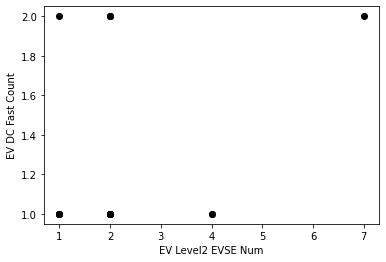

In [89]:
plt.scatter(montreal_dataset['EV Level2 EVSE Num'],montreal_dataset['EV DC Fast Count'],c='black')
plt.xlabel("EV Level2 EVSE Num")
plt.ylabel("EV DC Fast Count")
plt.show()

In [90]:
analysis = montreal_dataset[['EV Level2 EVSE Num','EV DC Fast Count']]

In [91]:
analysis

,EV Level2 EVSE Num,EV DC Fast Count
0,2.0,NaN
1,1.0,NaN
2,2.0,NaN
3,1.0,NaN
4,1.0,NaN
...,...,...
869,7.0,2.0
870,2.0,NaN
871,1.0,NaN
872,4.0,NaN


This shows that EV Level2 EVSE Num has 2.0 correlating with EV DC Fast Count of value 12 (maximum)

In [92]:
montreal_dataset.groupby(['EV Level2 EVSE Num'])['EV DC Fast Count'].count()

EV Level2 EVSE Num
1.0      5
2.0     12
3.0      0
4.0      2
5.0      0
6.0      0
7.0      1
8.0      0
9.0      0
10.0     0
11.0     0
12.0     0
15.0     0
25.0     0
Name: EV DC Fast Count, dtype: int64

In [93]:
# montreal_dataset.groupby(['EV Level2 EVSE Num'])['EV DC Fast Count'].count().describe()

In [94]:
analytics2 = montreal_dataset[["EV Level2 EVSE Num","EV DC Fast Count","Facility Type"]]

In [95]:
analytics2

,EV Level2 EVSE Num,EV DC Fast Count,Facility Type
0,2.0,NaN,NaN
1,1.0,NaN,NaN
2,2.0,NaN,NaN
3,1.0,NaN,NaN
4,1.0,NaN,NaN
...,...,...,...
869,7.0,2.0,NaN
870,2.0,NaN,NaN
871,1.0,NaN,NaN
872,4.0,NaN,NaN


In [96]:
montreal_dataset.groupby(['EV Level2 EVSE Num'])['Facility Type'].count()

EV Level2 EVSE Num
1.0      9
2.0     14
3.0     11
4.0      2
5.0      1
6.0      2
7.0      0
8.0      2
9.0      1
10.0     0
11.0     0
12.0     3
15.0     0
25.0     1
Name: Facility Type, dtype: int64

In [97]:
montreal_dataset.groupby(['EV Level2 EVSE Num'])['Facility Type'].unique()

EV Level2 EVSE Num
1.0       [nan, HOSPITAL, HOTEL, OFFICE_BLDG, CAR_DEALER]
2.0     [nan, RESTAURANT, HOTEL, OFFICE_BLDG, HOSPITAL...
3.0     [nan, HOTEL, TRAVEL_CENTER, OTHER, CAR_DEALER,...
4.0                                          [nan, HOTEL]
5.0                                          [nan, HOTEL]
6.0                             [nan, OFFICE_BLDG, HOTEL]
7.0                                                 [nan]
8.0                                          [nan, HOTEL]
9.0                                          [nan, HOTEL]
10.0                                                [nan]
11.0                                                [nan]
12.0                                  [HOTEL, PAY_GARAGE]
15.0                                                [nan]
25.0                                         [PAY_GARAGE]
Name: Facility Type, dtype: object

In [98]:
montreal_dataset.groupby(['EV Level2 EVSE Num'])['Facility Type'].nunique()

EV Level2 EVSE Num
1.0     4
2.0     6
3.0     6
4.0     1
5.0     1
6.0     2
7.0     0
8.0     1
9.0     1
10.0    0
11.0    0
12.0    2
15.0    0
25.0    1
Name: Facility Type, dtype: int64

In [99]:
montreal_dataset.groupby(['Facility Type'])['EV Level2 EVSE Num'].count()

Facility Type
CAR_DEALER              5
GAS_STATION             0
HOSPITAL                3
HOTEL                  24
OFFICE_BLDG             4
OTHER                   1
PAY_GARAGE              2
REC_SPORTS_FACILITY     1
RESTAURANT              3
SHOPPING_CENTER         2
TRAVEL_CENTER           1
Name: EV Level2 EVSE Num, dtype: int64

In [100]:
montreal_dataset.groupby(['Facility Type'])['EV Level2 EVSE Num'].unique()

Facility Type
CAR_DEALER                                            [3.0, 1.0, 2.0]
GAS_STATION                                                     [nan]
HOSPITAL                                                   [1.0, 2.0]
HOTEL                  [12.0, 3.0, 2.0, 1.0, 8.0, 9.0, 6.0, 4.0, 5.0]
OFFICE_BLDG                                           [1.0, 2.0, 6.0]
OTHER                                                           [3.0]
PAY_GARAGE                                               [25.0, 12.0]
REC_SPORTS_FACILITY                                             [3.0]
RESTAURANT                                            [2.0, 3.0, nan]
SHOPPING_CENTER                                                 [2.0]
TRAVEL_CENTER                                                   [3.0]
Name: EV Level2 EVSE Num, dtype: object

In [101]:
montreal_dataset.groupby(['Facility Type'])['EV DC Fast Count'].count()

Facility Type
CAR_DEALER             0
GAS_STATION            1
HOSPITAL               0
HOTEL                  0
OFFICE_BLDG            0
OTHER                  0
PAY_GARAGE             0
REC_SPORTS_FACILITY    0
RESTAURANT             1
SHOPPING_CENTER        0
TRAVEL_CENTER          0
Name: EV DC Fast Count, dtype: int64

In [102]:
montreal_dataset.groupby(['Facility Type'])['EV DC Fast Count'].unique()

Facility Type
CAR_DEALER                  [nan]
GAS_STATION                 [1.0]
HOSPITAL                    [nan]
HOTEL                       [nan]
OFFICE_BLDG                 [nan]
OTHER                       [nan]
PAY_GARAGE                  [nan]
REC_SPORTS_FACILITY         [nan]
RESTAURANT             [nan, 2.0]
SHOPPING_CENTER             [nan]
TRAVEL_CENTER               [nan]
Name: EV DC Fast Count, dtype: object

In [103]:
#Using K-means clustering: Algorithm implementation

Checking NA values in dataset

In [104]:
montreal_dataset.isnull().any()

ZIP                   False
Access Days Time      False
EV Level2 EVSE Num     True
EV DC Fast Count       True
EV Network            False
Latitude              False
Longitude             False
EV Connector Types    False
Access Code           False
Access Detail Code     True
Facility Type          True
EV Pricing             True
dtype: bool

In [105]:
#Data Imputation

Found some Null / Na Values, going to imputate them for clustering

In [106]:
montreal_dataset['EV DC Fast Count'].median()

2.0

In [107]:
montreal_dataset['EV DC Fast Count'].fillna(stats.mode(montreal_dataset["EV DC Fast Count"])[0][0],inplace=True)

In [108]:
montreal_dataset["EV DC Fast Count"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
869    2.0
870    1.0
871    1.0
872    1.0
873    1.0
Name: EV DC Fast Count, Length: 874, dtype: float64

In [109]:
montreal_dataset.fillna(montreal_dataset.median(),inplace=True)

Found again some Null values, they are string

In [110]:
montreal_dataset.isna().any()

ZIP                   False
Access Days Time      False
EV Level2 EVSE Num    False
EV DC Fast Count      False
EV Network            False
Latitude              False
Longitude             False
EV Connector Types    False
Access Code           False
Access Detail Code     True
Facility Type          True
EV Pricing             True
dtype: bool

Dtype object means string values

In [111]:
montreal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIP                 874 non-null    object 
 1   Access Days Time    874 non-null    object 
 2   EV Level2 EVSE Num  874 non-null    float64
 3   EV DC Fast Count    874 non-null    float64
 4   EV Network          874 non-null    object 
 5   Latitude            874 non-null    float64
 6   Longitude           874 non-null    float64
 7   EV Connector Types  874 non-null    object 
 8   Access Code         874 non-null    object 
 9   Access Detail Code  3 non-null      object 
 10  Facility Type       48 non-null     object 
 11  EV Pricing          103 non-null    object 
dtypes: float64(4), object(8)
memory usage: 82.1+ KB


In [112]:
montreal_dataset['EV Network'].unique()

array(['Circuit Ã©lectrique', 'FLO', 'Tesla Destination',
       'ChargePoint Network', 'Non-Networked', 'Tesla',
       'SemaCharge Network', 'CHARGELAB'], dtype=object)

In [113]:
montreal_dataset['Access Detail Code'].unique()

array([nan, 'CALL', 'CREDIT_CARD_ALWAYS'], dtype=object)

In [114]:
montreal_dataset['Access Code'].unique()

array(['public'], dtype=object)

In [115]:
montreal_dataset['EV Connector Types'].unique()

array(['J1772', 'CHADEMO J1772 J1772COMBO', 'J1772 TESLA',
       'CHADEMO J1772COMBO', 'TESLA', 'J1772COMBO', 'J1772 J1772COMBO',
       'CHADEMO'], dtype=object)

Changing all EV Connector Types value to J1772

In [116]:
montreal_dataset.loc[(montreal_dataset['EV Connector Types'] != 'J1772'), 'EV Connector Types'] = 'J1772'

In [117]:
montreal_dataset['EV Connector Types'].unique()

array(['J1772'], dtype=object)

In [118]:
montreal_dataset['EV Connector Types'].count()

874

In [119]:
montreal_dataset[['EV Network','Access Detail Code','Facility Type','EV Pricing']]

,EV Network,Access Detail Code,Facility Type,EV Pricing
0,Circuit Ã©lectrique,NaN,NaN,NaN
1,Circuit Ã©lectrique,NaN,NaN,NaN
2,Circuit Ã©lectrique,NaN,NaN,NaN
3,Circuit Ã©lectrique,NaN,NaN,NaN
4,Circuit Ã©lectrique,NaN,NaN,NaN
...,...,...,...,...
869,Circuit Ã©lectrique,NaN,NaN,NaN
870,Circuit Ã©lectrique,NaN,NaN,NaN
871,FLO,NaN,NaN,NaN
872,ChargePoint Network,NaN,NaN,Free


In [120]:
montreal_dataset.isna().sum()

ZIP                     0
Access Days Time        0
EV Level2 EVSE Num      0
EV DC Fast Count        0
EV Network              0
Latitude                0
Longitude               0
EV Connector Types      0
Access Code             0
Access Detail Code    871
Facility Type         826
EV Pricing            771
dtype: int64

Filling Null values in EV pricing, Facility Type and Access Detail Code to "Not Available"

In [121]:
montreal_dataset['Access Detail Code'].fillna("Not Available",inplace=True)

In [122]:
montreal_dataset['Access Detail Code'].unique()

array(['Not Available', 'CALL', 'CREDIT_CARD_ALWAYS'], dtype=object)

In [123]:
montreal_dataset['EV Pricing'].fillna("Not Available",inplace=True)

In [124]:
montreal_dataset['EV Pricing'].unique()

array(['Not Available', 'Free',
       'Pricing is based on length of time. $0 per hour for the first 1 hour, and $1.5 per additional hour',
       'Pricing is based on length of time. $0.1 per hour for the first 1 hour, and $0.2 per additional hour',
       '$0.5 per hour', '$1 per hour', 'free', '$1 per kWh',
       'Pricing is based on length of time and kWh used. $0 per hour for the first 3 hours, and $5 per additional hour, $1 per kWh, minimum payment of $1, maximum payment of $30',
       '$0.44 per minute above 60 kW and $0.22 per minute at or below 60 kW',
       '$2 per hour', '$5 per session, maximum session time is 1 hour',
       '$1.00/Hr Parking Fee', '$2 per hour, maximum payment of $20',
       'Billed by time plugged in',
       'Pricing is based on length of time. $1 per hour, and $3 per additional hour'],
      dtype=object)

In [125]:
montreal_dataset['Facility Type'].fillna("Not Available",inplace=True)

In [126]:
montreal_dataset['Facility Type'].unique()

array(['Not Available', 'RESTAURANT', 'HOSPITAL', 'HOTEL', 'PAY_GARAGE',
       'TRAVEL_CENTER', 'OFFICE_BLDG', 'OTHER', 'CAR_DEALER',
       'GAS_STATION', 'SHOPPING_CENTER', 'REC_SPORTS_FACILITY'],
      dtype=object)

In [127]:
montreal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIP                 874 non-null    object 
 1   Access Days Time    874 non-null    object 
 2   EV Level2 EVSE Num  874 non-null    float64
 3   EV DC Fast Count    874 non-null    float64
 4   EV Network          874 non-null    object 
 5   Latitude            874 non-null    float64
 6   Longitude           874 non-null    float64
 7   EV Connector Types  874 non-null    object 
 8   Access Code         874 non-null    object 
 9   Access Detail Code  874 non-null    object 
 10  Facility Type       874 non-null    object 
 11  EV Pricing          874 non-null    object 
dtypes: float64(4), object(8)
memory usage: 82.1+ KB


In [128]:
montreal_dataset[['EV Network','Access Detail Code','Facility Type','EV Pricing']]

,EV Network,Access Detail Code,Facility Type,EV Pricing
0,Circuit Ã©lectrique,Not Available,Not Available,Not Available
1,Circuit Ã©lectrique,Not Available,Not Available,Not Available
2,Circuit Ã©lectrique,Not Available,Not Available,Not Available
3,Circuit Ã©lectrique,Not Available,Not Available,Not Available
4,Circuit Ã©lectrique,Not Available,Not Available,Not Available
...,...,...,...,...
869,Circuit Ã©lectrique,Not Available,Not Available,Not Available
870,Circuit Ã©lectrique,Not Available,Not Available,Not Available
871,FLO,Not Available,Not Available,Not Available
872,ChargePoint Network,Not Available,Not Available,Free


In [129]:
montreal_dataset.groupby('Facility Type')['EV Pricing'].unique()

Facility Type
CAR_DEALER                                                        [Free]
GAS_STATION                                  [Billed by time plugged in]
HOSPITAL                                           [Free, Not Available]
HOTEL                                                             [Free]
Not Available          [Not Available, Free, Pricing is based on leng...
OFFICE_BLDG                                    [free, $1 per hour, Free]
OTHER                                                             [Free]
PAY_GARAGE                                                        [Free]
REC_SPORTS_FACILITY                                               [Free]
RESTAURANT                                         [Free, Not Available]
SHOPPING_CENTER                                                   [Free]
TRAVEL_CENTER                                              [$1 per hour]
Name: EV Pricing, dtype: object

In [130]:
montreal_dataset.groupby('Facility Type')['Access Detail Code'].unique()

Facility Type
CAR_DEALER             [Not Available, CALL]
GAS_STATION             [CREDIT_CARD_ALWAYS]
HOSPITAL                     [Not Available]
HOTEL                        [Not Available]
Not Available                [Not Available]
OFFICE_BLDG                  [Not Available]
OTHER                        [Not Available]
PAY_GARAGE                   [Not Available]
REC_SPORTS_FACILITY          [Not Available]
RESTAURANT                   [Not Available]
SHOPPING_CENTER              [Not Available]
TRAVEL_CENTER                [Not Available]
Name: Access Detail Code, dtype: object

In [131]:
montreal_dataset.groupby('Facility Type')['EV Network'].unique()

Facility Type
CAR_DEALER                                               [Non-Networked]
GAS_STATION                                                  [CHARGELAB]
HOSPITAL                                                 [Non-Networked]
HOTEL                                 [Tesla Destination, Non-Networked]
Not Available          [Circuit Ã©lectrique, FLO, Tesla Destination, ...
OFFICE_BLDG                                              [Non-Networked]
OTHER                                                [Tesla Destination]
PAY_GARAGE                                           [Tesla Destination]
REC_SPORTS_FACILITY                                  [Tesla Destination]
RESTAURANT                            [Tesla Destination, Non-Networked]
SHOPPING_CENTER                       [Non-Networked, Tesla Destination]
TRAVEL_CENTER                                            [Non-Networked]
Name: EV Network, dtype: object

In [132]:
montreal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIP                 874 non-null    object 
 1   Access Days Time    874 non-null    object 
 2   EV Level2 EVSE Num  874 non-null    float64
 3   EV DC Fast Count    874 non-null    float64
 4   EV Network          874 non-null    object 
 5   Latitude            874 non-null    float64
 6   Longitude           874 non-null    float64
 7   EV Connector Types  874 non-null    object 
 8   Access Code         874 non-null    object 
 9   Access Detail Code  874 non-null    object 
 10  Facility Type       874 non-null    object 
 11  EV Pricing          874 non-null    object 
dtypes: float64(4), object(8)
memory usage: 82.1+ KB


In [133]:
#Ranking Facility type and Category in montreal and point of interest dataset respectively

Changing value of Department Stores in poi dataset since it has same values repeated two times

In [134]:
points_of_interest_dataset['CATEGORY'].unique()

array(['Restaurants', 'Amusement and Recreation Services',
       'Universities, and Colleges', 'Motor Vehicle Dealers',
       'Museums and Art Galleries', 'Bar', 'Hotels', 'Parking ',
       'Movie Theaters', 'Department Stores', 'Furniture Stores',
       'Shopping Center and Malls', 'Warehouse Stores',
       ' Department Stores'], dtype=object)

In [135]:
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == ' Department Stores'), 'CATEGORY'] = 'Department Stores'

In [136]:
points_of_interest_dataset['CATEGORY'].unique()

array(['Restaurants', 'Amusement and Recreation Services',
       'Universities, and Colleges', 'Motor Vehicle Dealers',
       'Museums and Art Galleries', 'Bar', 'Hotels', 'Parking ',
       'Movie Theaters', 'Department Stores', 'Furniture Stores',
       'Shopping Center and Malls', 'Warehouse Stores'], dtype=object)

Ranking according to the same labels in both columns

In [137]:
rank = pd.DataFrame({"Facility Type":montreal_dataset["Facility Type"],"CATEGORY":points_of_interest_dataset["CATEGORY"]},index=points_of_interest_dataset.index)

In [138]:
from scipy.stats import rankdata

In [139]:
rank['r category'] = (rankdata(rank['CATEGORY'],method='dense') -1).astype(int)

Discarding rank values since there are some values that dont reside with each other alphabetically, but logically reside

In [140]:
rank['r category'].unique()

array([ 9,  0, 11,  5,  7,  1,  4,  8,  6,  2,  3, 10, 12])

In [141]:
rank['Facility Type'].unique()

array(['Not Available', 'RESTAURANT', 'HOSPITAL', 'HOTEL', 'PAY_GARAGE',
       'TRAVEL_CENTER', 'OFFICE_BLDG', 'OTHER', 'CAR_DEALER',
       'GAS_STATION', 'SHOPPING_CENTER', 'REC_SPORTS_FACILITY', nan],
      dtype=object)

In [142]:
rank['CATEGORY'].unique()

array(['Restaurants', 'Amusement and Recreation Services',
       'Universities, and Colleges', 'Motor Vehicle Dealers',
       'Museums and Art Galleries', 'Bar', 'Hotels', 'Parking ',
       'Movie Theaters', 'Department Stores', 'Furniture Stores',
       'Shopping Center and Malls', 'Warehouse Stores'], dtype=object)

Doing ranking manually since fuzzywuzzy is not giving accurate results

In [143]:
# pip install fuzzywuzzy[speedup]
# from fuzzywuzzy import fuzz

In [144]:
def resolveRankSingle(param1:str,ranknumber:int):
  return [param1,ranknumber]

In [145]:
def resolveRank(param1:str, param2:str, ranknumber:int):
  return [param1,param2, ranknumber]

In [146]:
resolved= []
resolved.append(resolveRank('RESTAURANT','Restaurants',2))
resolved.append(resolveRank('HOTEL','Hotels',2))
resolved.append(resolveRank('SHOPPING_CENTER','Shopping Center and Malls',2))
resolved.append(resolveRank('PAY_GARAGE','Parking ',3))
resolved.append(resolveRank('CAR_DEALER','Motor Vehicle Dealers',4))
resolved.append(resolveRank('REC_SPORTS_FACILITY','Amusement and Recreation Services',5))

# other values that dont reside with each other
resolved.append(resolveRankSingle('HOSPITAL',12))
resolved.append(resolveRankSingle('TRAVEL_CENTER',3))
resolved.append(resolveRankSingle('OFFICE_BLDG',3))
resolved.append(resolveRankSingle('OTHER',15))
resolved.append(resolveRankSingle('GAS_STATION',3))
resolved.append(resolveRankSingle('Not Available',17))
resolved.append(resolveRankSingle('Bar',18))

resolved.append(resolveRankSingle('Universities, and Colleges',6))
resolved.append(resolveRankSingle('Museums and Art Galleries',7))
resolved.append(resolveRankSingle('Movie Theaters',8))
resolved.append(resolveRankSingle('Department Stores',9))
resolved.append(resolveRankSingle('Furniture Stores',10))
resolved.append(resolveRankSingle('Warehouse Stores',11))

Thus all the values are mapped according to ranking, directly we can put the rank number in the datasets

In [147]:
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Restaurants'), 'CATEGORY'] = 0
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Hotels'), 'CATEGORY'] = 1
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Shopping Center and Malls'), 'CATEGORY'] = 2
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Parking '), 'CATEGORY'] = 3
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Motor Vehicle Dealers'), 'CATEGORY'] = 4
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Amusement and Recreation Services'), 'CATEGORY'] = 5
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Universities, and Colleges'), 'CATEGORY'] = 6
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Museums and Art Galleries'), 'CATEGORY'] = 7
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Movie Theaters'), 'CATEGORY'] = 8
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Department Stores'), 'CATEGORY'] = 9
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Furniture Stores'), 'CATEGORY'] = 10
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Warehouse Stores'), 'CATEGORY'] = 11
points_of_interest_dataset.loc[(points_of_interest_dataset['CATEGORY'] == 'Bar'), 'CATEGORY'] = 18

In [148]:
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'RESTAURANT'), 'Facility Type'] = 0
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'HOTEL'), 'Facility Type'] = 1
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'SHOPPING_CENTER'), 'Facility Type'] = 2
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'PAY_GARAGE'), 'Facility Type'] = 3
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'CAR_DEALER'), 'Facility Type'] = 4
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'REC_SPORTS_FACILITY'), 'Facility Type'] = 5
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'HOSPITAL'), 'Facility Type'] = 12
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'TRAVEL_CENTER'), 'Facility Type'] = 13
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'OFFICE_BLDG'), 'Facility Type'] = 14
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'OTHER'), 'Facility Type'] = 15
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'GAS_STATION'), 'Facility Type'] = 16
montreal_dataset.loc[(montreal_dataset['Facility Type'] == 'Not Available'), 'Facility Type'] = 17

In [149]:
# Used that before but it skipped the values after 873
# rank['Facility Type'] = montreal_dataset["Facility Type"]
# rank['CATEGORY'] = points_of_interest_dataset["CATEGORY"]

Now performing LabelEncoding to all object dtypes

In [150]:
le = LabelEncoder()
le.fit(montreal_dataset['Access Days Time'])
montreal_dataset['Access Days Time'] = le.transform(montreal_dataset['Access Days Time'])
le.fit(montreal_dataset['EV Network'])
montreal_dataset['EV Network'] = le.transform(montreal_dataset['EV Network'])
le.fit(montreal_dataset['ZIP'])
montreal_dataset['ZIP'] = le.transform(montreal_dataset['ZIP'])

# mapping labelencoding values for decoding to specific postal code in future
zip_mapping = dict(zip(le.classes_, range(1, len(le.classes_)+1)))
le.fit(montreal_dataset['EV Connector Types'])
montreal_dataset['EV Connector Types']=le.transform(montreal_dataset['EV Connector Types'])
le.fit(montreal_dataset['Access Code'])
montreal_dataset['Access Code']=le.transform(montreal_dataset['Access Code'])
le.fit(montreal_dataset['Access Detail Code'])
montreal_dataset['Access Detail Code']=le.transform(montreal_dataset['Access Detail Code'])

# Not using labelencoding on Facility type since we are using rank method
# le.fit(montreal_dataset['Facility Type'])
# montreal_dataset['Facility Type']=le.transform(montreal_dataset['Facility Type'])

le.fit(montreal_dataset['EV Pricing'])
montreal_dataset['EV Pricing']=le.transform(montreal_dataset['EV Pricing'])

In [151]:
montreal_dataset

,ZIP,Access Days Time,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,EV Connector Types,Access Code,Access Detail Code,Facility Type,EV Pricing
0,0,1,2.0,1.0,2,45.668567,-73.494620,0,0,2,17,10
1,1,1,1.0,1.0,2,45.657335,-73.508256,0,0,2,17,10
2,2,1,2.0,1.0,2,45.657871,-73.508430,0,0,2,17,10
3,3,1,1.0,1.0,2,45.650494,-73.511673,0,0,2,17,10
4,4,1,1.0,1.0,2,45.612501,-73.510362,0,0,2,17,10
...,...,...,...,...,...,...,...,...,...,...,...,...
869,800,1,7.0,2.0,2,45.773582,-73.999863,0,0,2,17,10
870,801,1,2.0,1.0,2,45.771883,-73.996031,0,0,2,17,10
871,802,1,1.0,1.0,3,45.774653,-74.003878,0,0,2,17,10
872,803,1,4.0,1.0,1,45.766680,-73.999248,0,0,2,17,9


Finding optimal no. of clusters (to predict optimal-tier location based on dataset)

In [152]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # kmeans.fit(montreal_dataset)
    # mon_dataset = montreal_dataset[['EV Level2 EVSE Num','EV DC Fast Count','Latitude','Longitude','Facility Type','ZIP']]
    mon_dataset = montreal_dataset[['EV Level2 EVSE Num','EV DC Fast Count','Latitude','Longitude','Facility Type','ZIP','EV Connector Types','Access Code']]
    X = mon_dataset
    # removed EV Network, Access Detail Code, EV pricing since they are not our interested values
    kmeans.fit(X)
    # kmeans.fit(montreal_dataset[['EV Level2 EVSE Num','EV DC Fast Count',	'EV Network','Latitude','Longitude','Access Detail Code','Facility Type','EV Pricing']])
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

Fitting K-Means to the dataset

In [153]:
kmeans = KMeans(n_clusters = 30)    
y_kmeans = kmeans.fit_predict(X)

In [154]:
kmeans.cluster_centers_

array([[  2.32258065,   1.        ,  45.52999668, -73.59926752,
         17.        , 241.87096774,   0.        ,   0.        ],
       [  1.81481481,   1.        ,  45.54934242, -73.42877885,
         15.22222222, 661.81481481,   0.        ,   0.        ],
       [  2.32      ,   1.04      ,  45.60287283, -73.55141014,
         17.        ,  34.2       ,   0.        ,   0.        ],
       [  1.89655172,   1.        ,  45.48294173, -73.61928542,
         17.        , 476.        ,   0.        ,   0.        ],
       [  1.80645161,   1.06451613,  45.7056169 , -73.65044881,
         15.67741935, 760.90322581,   0.        ,   0.        ],
       [  3.29166667,   1.        ,  45.51949968, -73.57731725,
         14.875     , 343.95833333,   0.        ,   0.        ],
       [  2.08571429,   1.        ,  45.57767277, -73.60518098,
         17.        , 117.65714286,   0.        ,   0.        ],
       [  2.60714286,   1.75      ,  45.55493178, -73.75885882,
         16.42857143, 585.3571428

In [155]:
montreal_centroids = kmeans.cluster_centers_

In [156]:
montreal_centroids[:, 0]

array([2.32258065, 1.81481481, 2.32      , 1.89655172, 1.80645161,
       3.29166667, 2.08571429, 2.60714286, 2.64516129, 1.96551724,
       2.65517241, 2.48148148, 3.27586207, 2.5       , 2.48387097,
       2.3030303 , 1.94285714, 3.22222222, 1.88235294, 1.72      ,
       2.10344828, 2.20512821, 2.        , 2.40740741, 1.89285714,
       2.21428571, 1.92857143, 2.07692308, 2.16      , 3.77777778])

Ideal Location for Latitude and Longitude according to the concerned data values from the greater montreal dataset

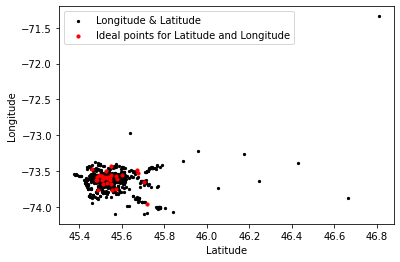

Ideal points for Latitude: [45.52999668 45.54934242 45.60287283 45.48294173 45.7056169  45.51949968
 45.57767277 45.55493178 45.54623165 45.48447134 45.55004299 45.45895335
 45.49337369 45.50562866 45.48721323 45.54932209 45.53553388 45.50720655
 45.71853885 45.67375641 45.54401472 45.51149919 45.53027514 45.57388408
 45.67481567 45.47828645 45.57127416 45.52695955 45.51322666 45.50217916]
Ideal points for Longitude: [-73.59926752 -73.42877885 -73.55141014 -73.61928542 -73.65044881
 -73.57731725 -73.60518098 -73.75885882 -73.58347052 -73.57890823
 -73.68361715 -73.46977943 -73.5585131  -73.62883263 -73.76325819
 -73.55746936 -73.58485565 -73.56396952 -73.95460415 -73.48456768
 -73.629203   -73.68477385 -73.67218026 -73.75426108 -73.52218143
 -73.61845392 -73.57296626 -73.49840203 -73.61309289 -73.57143383]


In [157]:
plt.scatter(montreal_dataset['Latitude'],montreal_dataset['Longitude'],c='black', label= 'Longitude & Latitude',s=5)
plt.scatter(montreal_centroids[:, 2], montreal_centroids[:, 3], c='red', label='Ideal points for Latitude and Longitude', s=10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()
print("Ideal points for Latitude:", montreal_centroids[:, 2])
print("Ideal points for Longitude:", montreal_centroids[:, 3])

Ideal for EVSE Level Num2 and EV DC Fast Count

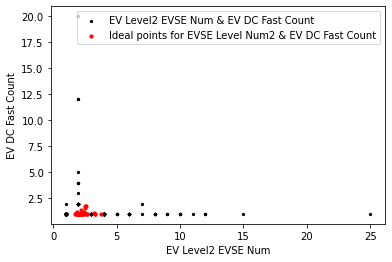

Ideal Location for EV Level2 EVSE Num: [2.32258065 1.81481481 2.32       1.89655172 1.80645161 3.29166667
 2.08571429 2.60714286 2.64516129 1.96551724 2.65517241 2.48148148
 3.27586207 2.5        2.48387097 2.3030303  1.94285714 3.22222222
 1.88235294 1.72       2.10344828 2.20512821 2.         2.40740741
 1.89285714 2.21428571 1.92857143 2.07692308 2.16       3.77777778]
Ideal Location for EV DC Fast Count: [1.         1.         1.04       1.         1.06451613 1.
 1.         1.75       1.         1.03448276 1.03448276 1.55555556
 1.         1.         1.80645161 1.         1.         1.11111111
 1.05882353 1.04       1.         1.33333333 1.03703704 1.14814815
 1.17857143 1.         1.         1.03846154 1.         1.        ]


In [158]:
plt.scatter(montreal_dataset['EV Level2 EVSE Num'],montreal_dataset['EV DC Fast Count'],c='black', label= 'EV Level2 EVSE Num & EV DC Fast Count',s=5)
plt.scatter(montreal_centroids[:, 0], montreal_centroids[:, 1], c='red',label="Ideal points for EVSE Level Num2 & EV DC Fast Count", s=10)
plt.xlabel("EV Level2 EVSE Num")
plt.ylabel("EV DC Fast Count")
plt.legend()
plt.show()
print('Ideal Location for EV Level2 EVSE Num:', montreal_centroids[:,0])
print('Ideal Location for EV DC Fast Count:', montreal_centroids[:,1])

In [159]:
mon_dataset

,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,Facility Type,ZIP,EV Connector Types,Access Code
0,2.0,1.0,45.668567,-73.494620,17,0,0,0
1,1.0,1.0,45.657335,-73.508256,17,1,0,0
2,2.0,1.0,45.657871,-73.508430,17,2,0,0
3,1.0,1.0,45.650494,-73.511673,17,3,0,0
4,1.0,1.0,45.612501,-73.510362,17,4,0,0
...,...,...,...,...,...,...,...,...
869,7.0,2.0,45.773582,-73.999863,17,800,0,0
870,2.0,1.0,45.771883,-73.996031,17,801,0,0
871,1.0,1.0,45.774653,-74.003878,17,802,0,0
872,4.0,1.0,45.766680,-73.999248,17,803,0,0


In [160]:
stats.mode(montreal_centroids[:,0])[0][0]

1.7199999999999998

In [161]:
np.mean(montreal_centroids[:,0])

2.3329616569441316

In [162]:
np.median(montreal_centroids[:,0])

2.20970695970696

Ideal EV DC Fast Count

In [163]:
stats.mode(montreal_centroids[:,1])[0][0]

1.0

Looking for ideal location ZIP code

In [164]:
zip_mode = stats.mode(montreal_centroids[:,5])   # last column is of ZIP

In [165]:
zip_mode[0][0]   # we have found our number, we then decode to the value

11.0

In [166]:
# function to return key for any value
def get_key(val,my_dict):
    for key, value in my_dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [167]:
get_key(23,zip_mapping)   # here is the value of ZIP

'H1H 4W3'

In [168]:
get_key(24,zip_mapping)   # since we got vale 23.55, we have assumed both the values of 23 and 24

'H1H 5R5'

Applying kmeans clustering to other datasets as well

In [169]:
census_1 = census_dataset[['X','Y','2016 Population','2016 Dwelling Count','2016 Occupied Dwelling Count','Area (sq. km)']]

In [170]:
census_1

,X,Y,2016 Population,2016 Dwelling Count,2016 Occupied Dwelling Count,Area (sq. km)
0,-74.01211,45.66353,50513,20395,19631,994.845387
1,-73.49604,45.54300,85721,34249,33257,92.228456
2,-73.49604,45.54300,41671,17134,16888,144.089454
3,-73.49604,45.54300,239700,110761,105533,235.667385
4,-73.49604,45.54300,26394,10418,10243,89.449089
5,-73.42399,45.83146,5913,2962,2878,4.751278
6,-73.42399,45.83146,3439,1494,1435,74.937797
7,-73.42399,45.83146,84285,33876,33321,127.932585
8,-73.42399,45.83146,22429,8932,8736,207.825104
9,-73.42399,45.83146,5493,2240,2166,4.908156


Applying k-means clustering to census dataset

In [171]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    X = census_1
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

Fitting k-means to the dataset

In [172]:
kmeans = KMeans(n_clusters = 30)
y_kmeans = kmeans.fit_predict(X)

In [173]:
kmeans.cluster_centers_

array([[-7.35546900e+01,  4.55124000e+01,  4.88990000e+04,
         1.76270000e+04,  1.72100000e+04,  3.06734651e+01],
       [-7.35546900e+01,  4.55124000e+01,  1.70469400e+06,
         8.43872000e+05,  7.79802000e+05,  7.46007589e+02],
       [-7.37443300e+01,  4.55520100e+01,  4.22993000e+05,
         1.65686000e+05,  1.60328000e+05,  5.04765526e+02],
       [-7.34239900e+01,  4.58314600e+01,  5.91300000e+03,
         2.96200000e+03,  2.87800000e+03,  4.75127830e+00],
       [-7.34960400e+01,  4.55430000e+01,  2.39700000e+05,
         1.10761000e+05,  1.05533000e+05,  2.35667385e+02],
       [-7.34960400e+01,  4.55430000e+01,  8.57210000e+04,
         3.42490000e+04,  3.32570000e+04,  9.22284556e+01],
       [-7.34239900e+01,  4.58314600e+01,  2.24290000e+04,
         8.93200000e+03,  8.73600000e+03,  2.07825104e+02],
       [-7.38927400e+01,  4.55417900e+01,  1.68600000e+03,
         8.65000000e+02,  7.30000000e+02,  8.75693488e+01],
       [-7.35546900e+01,  4.55124000e+01,  3.244

In [174]:
census_centroids = kmeans.cluster_centers_

In [175]:
census_centroids[:, 0],census_centroids[:,1]

(array([-73.55469   , -73.55469   , -73.74433   , -73.42399   ,
        -73.49604   , -73.49604   , -73.42399   , -73.89274   ,
        -73.55469   , -73.55469   , -73.89274   , -73.42399   ,
        -74.01211   , -73.49604   , -73.89274   , -73.49604   ,
        -73.55469   , -73.723715  , -73.55469   , -73.49604   ,
        -73.55469   , -73.55469   , -73.78005667, -73.42399   ,
        -73.55469   , -73.66737333, -73.55469   , -73.55469   ,
        -73.89274   , -73.42399   ]),
 array([45.5124    , 45.5124    , 45.55201   , 45.83146   , 45.543     ,
        45.543     , 45.83146   , 45.54179   , 45.5124    , 45.5124    ,
        45.54179   , 45.83146   , 45.66353   , 45.543     , 45.54179   ,
        45.543     , 45.5124    , 45.527095  , 45.5124    , 45.543     ,
        45.5124    , 45.5124    , 45.53199333, 45.83146   , 45.5124    ,
        45.52219667, 45.5124    , 45.5124    , 45.54179   , 45.83146   ]))

Ideal Location for Latitude and Longitude according to the concerned data values from the census dataset

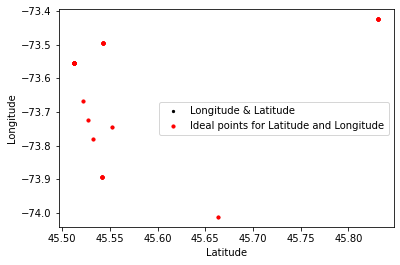

Ideal points for Latitude: [45.5124     45.5124     45.55201    45.83146    45.543      45.543
 45.83146    45.54179    45.5124     45.5124     45.54179    45.83146
 45.66353    45.543      45.54179    45.543      45.5124     45.527095
 45.5124     45.543      45.5124     45.5124     45.53199333 45.83146
 45.5124     45.52219667 45.5124     45.5124     45.54179    45.83146   ]
Ideal points for Longitude: [-73.55469    -73.55469    -73.74433    -73.42399    -73.49604
 -73.49604    -73.42399    -73.89274    -73.55469    -73.55469
 -73.89274    -73.42399    -74.01211    -73.49604    -73.89274
 -73.49604    -73.55469    -73.723715   -73.55469    -73.49604
 -73.55469    -73.55469    -73.78005667 -73.42399    -73.55469
 -73.66737333 -73.55469    -73.55469    -73.89274    -73.42399   ]


In [176]:
plt.scatter(census_1['Y'],census_1['X'],c='black', label= 'Longitude & Latitude',s=5)
plt.scatter(census_centroids[:, 1], census_centroids[:, 0], c='red', label='Ideal points for Latitude and Longitude', s=10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()
print("Ideal points for Latitude:", census_centroids[:, 1])
print("Ideal points for Longitude:", census_centroids[:, 0])

Ideal for Population and Dwelling Count

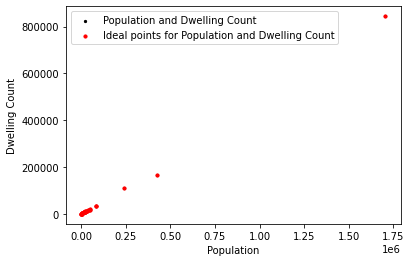

Ideal Location for Population: [4.88990000e+04 1.70469400e+06 4.22993000e+05 5.91300000e+03
 2.39700000e+05 8.57210000e+04 2.24290000e+04 1.68600000e+03
 3.24480000e+04 2.01510000e+04 4.40080000e+04 3.31950000e+03
 5.05130000e+04 2.63940000e+04 1.74960000e+04 4.16710000e+04
 1.89800000e+04 2.50000000e+00 3.13800000e+04 2.18610000e+04
 5.00400000e+03 2.03120000e+04 6.69600000e+03 8.42850000e+04
 2.02760000e+04 3.83233333e+03 1.93240000e+04 9.21000000e+02
 1.80740000e+04 5.49300000e+03]
Ideal Location for Dwelling Count: [1.76270000e+04 8.43872000e+05 1.65686000e+05 2.96200000e+03
 1.10761000e+05 3.42490000e+04 8.93200000e+03 8.65000000e+02
 1.43760000e+04 6.77900000e+03 1.87420000e+04 1.40900000e+03
 2.03950000e+04 1.04180000e+04 7.24000000e+03 1.71340000e+04
 8.81800000e+03 3.00000000e+01 1.28350000e+04 1.04460000e+04
 2.07550000e+03 9.61700000e+03 2.64233333e+03 3.38760000e+04
 7.91400000e+03 1.62433333e+03 6.82800000e+03 3.75000000e+02
 6.94100000e+03 2.24000000e+03]


In [177]:
plt.scatter(census_1['2016 Population'],census_1['2016 Dwelling Count'],c='black', label= 'Population and Dwelling Count',s=5)
plt.scatter(census_centroids[:, 2], census_centroids[:, 3], c='red',label="Ideal points for Population and Dwelling Count", s=10)
plt.xlabel("Population")
plt.ylabel("Dwelling Count")
plt.legend()
plt.show()
print('Ideal Location for Population:', census_centroids[:,2])
print('Ideal Location for Dwelling Count:', census_centroids[:,3])

In [178]:
print('Ideal Location for Area:\n', census_centroids[:,5])
print('\n')
print('Ideal Location for Longitude and Latitude:\n', census_centroids[:,0], '\n', '\n', census_centroids[:,1])

Ideal Location for Area:
 [ 30.67346514 746.00758943 504.76552629   4.7512783  235.66738549
  92.22845557 207.82510431  87.56934883  14.15879559  19.57407053
 144.30632869  94.22976867 994.84538701  89.44908903  12.40922698
 144.0894542   42.50796963  12.25935623  38.42526698  15.45107799
  12.04120585   8.22991267  32.89565918 127.93258518  15.34218673
  51.64324163  22.38655829  15.27731142  18.19825013   4.90815554]


Ideal Location for Longitude and Latitude:
 [-73.55469    -73.55469    -73.74433    -73.42399    -73.49604
 -73.49604    -73.42399    -73.89274    -73.55469    -73.55469
 -73.89274    -73.42399    -74.01211    -73.49604    -73.89274
 -73.49604    -73.55469    -73.723715   -73.55469    -73.49604
 -73.55469    -73.55469    -73.78005667 -73.42399    -73.55469
 -73.66737333 -73.55469    -73.55469    -73.89274    -73.42399   ] 
 
 [45.5124     45.5124     45.55201    45.83146    45.543      45.543
 45.83146    45.54179    45.5124     45.5124     45.54179    45.83146
 45.663

Now applying K-means on Points of Interests dataset

In [179]:
points_of_interest_dataset # this dataset has values of restaurants, banks and other interest regions

,POI_ID,NAME,ADDRESS,CITY,PROV,POST_CODE,PHONE,X,Y,CATEGORY
0,POI10004697,RESTAURANT ALADDIN,6700 CH DE LA CÃƒÆ’Ã‚â€TE DES NEIGES,MONTREAL,QC,H3S 2B2,514-342-7808,-73.637063,45.502503,0
1,POI10014792,PIZZERIA SAINT-DENIS,1617 RUE SAINT DENIS,MONTREAL,QC,H2X 3K3,514-281-6669,-73.562842,45.515012,0
2,POI10014794,TIFFANY CASINO,3775 BOUL INDUSTRIEL,MONTREAL,QC,H1H 2Y8,514-328-0080,-73.633118,45.580402,5
3,POI10014903,EL TACO DEL TABARNACO,916 AV DULUTH E,MONTREAL,QC,H2L 1B6,514-528-9865,-73.573235,45.523408,0
4,POI10014917,EL DIONELLI,5600 RUE DE SALABERRY,MONTREAL,QC,H4J 1J7,514-332-8999,-73.710948,45.528730,0
...,...,...,...,...,...,...,...,...,...,...
4680,POI85872,RESTAURANT PIZZERIA SANDHU,4548 AV PAPINEAU,MONTREAL,QC,H2H 1V3,514-524-8685,-73.575604,45.533146,0
4681,POI96916,HÃƒÆ’Ã‚â€TEL LA RÃ‰SIDENCE DU VOYAGEUR,847 RUE SHERBROOKE E,MONTREAL,QC,H2L 1K6,514-527-9515,-73.566512,45.519761,1
4682,POI98943,PICASSO SERRE,6810 RUE SAINT JACQUES,MONTREAL,QC,H4B 1V8,514-484-2832,-73.627736,45.457981,0
4683,POI99080,HOTEL RITZ-CARLTON MONTREAL,1228 RUE SHERBROOKE O,MONTREAL,QC,H3G 1H6,514-842-4212,-73.578030,45.500217,1


In [180]:
poi_dataset = points_of_interest_dataset[['X','Y','CATEGORY','POST_CODE']]

In [181]:
poi_dataset

,X,Y,CATEGORY,POST_CODE
0,-73.637063,45.502503,0,H3S 2B2
1,-73.562842,45.515012,0,H2X 3K3
2,-73.633118,45.580402,5,H1H 2Y8
3,-73.573235,45.523408,0,H2L 1B6
4,-73.710948,45.528730,0,H4J 1J7
...,...,...,...,...
4680,-73.575604,45.533146,0,H2H 1V3
4681,-73.566512,45.519761,1,H2L 1K6
4682,-73.627736,45.457981,0,H4B 1V8
4683,-73.578030,45.500217,1,H3G 1H6


In [182]:
poi_dataset[['X','Y','CATEGORY','POST_CODE']]

,X,Y,CATEGORY,POST_CODE
0,-73.637063,45.502503,0,H3S 2B2
1,-73.562842,45.515012,0,H2X 3K3
2,-73.633118,45.580402,5,H1H 2Y8
3,-73.573235,45.523408,0,H2L 1B6
4,-73.710948,45.528730,0,H4J 1J7
...,...,...,...,...
4680,-73.575604,45.533146,0,H2H 1V3
4681,-73.566512,45.519761,1,H2L 1K6
4682,-73.627736,45.457981,0,H4B 1V8
4683,-73.578030,45.500217,1,H3G 1H6


In [183]:
# le.fit_transform(poi_dataset["CATEGORY"])

In [184]:
# poi_dataset["CATEGORY"] = le.fit_transform(poi_dataset["CATEGORY"])
# category_mapping = dict(zip(le.classes_, range(1, len(le.classes_)+1)))
poi_dataset["POST_CODE"] = le.fit_transform(poi_dataset["POST_CODE"])
postcode_mapping = dict(zip(le.classes_, range(1, len(le.classes_)+1)))

c:\users\omaim\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [185]:
poi_dataset

,X,Y,CATEGORY,POST_CODE
0,-73.637063,45.502503,0,1995
1,-73.562842,45.515012,0,1338
2,-73.633118,45.580402,5,108
3,-73.573235,45.523408,0,788
4,-73.710948,45.528730,0,2251
...,...,...,...,...
4680,-73.575604,45.533146,0,640
4681,-73.566512,45.519761,1,800
4682,-73.627736,45.457981,0,2167
4683,-73.578030,45.500217,1,1732


In [186]:
poi_dataset['CATEGORY'].unique()

array([0, 5, 6, 4, 7, 18, 1, 3, 8, 9, 10, 2, 11], dtype=object)

In [187]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    X = poi_dataset[['X','Y','CATEGORY','POST_CODE']]
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

Fitting k-means to the dataset

In [188]:
kmeans = KMeans(n_clusters = 30)
y_kmeans = kmeans.fit_predict(X)

In [189]:
kmeans.cluster_centers_

array([[-7.35938468e+01,  4.56024429e+01,  3.09009009e+00,
         1.18360360e+02],
       [-7.35796644e+01,  4.54926769e+01,  2.32947977e+00,
         1.83583237e+03],
       [-7.36175198e+01,  4.55383740e+01,  2.34027778e+00,
         1.00115972e+03],
       [-7.36822039e+01,  4.54991314e+01,  1.74000000e+00,
         2.33292000e+03],
       [-7.35606486e+01,  4.55057086e+01,  1.27329193e+00,
         1.47821739e+03],
       [-7.36141812e+01,  4.55496767e+01,  3.02205882e+00,
         5.80286765e+02],
       [-7.36071732e+01,  4.54672782e+01,  3.27480916e+00,
         2.17108397e+03],
       [-7.35721822e+01,  4.55157262e+01,  2.79775281e+00,
         1.25447753e+03],
       [-7.35690672e+01,  4.55713947e+01,  2.86400000e+00,
         2.91168000e+02],
       [-7.35685217e+01,  4.55008247e+01,  1.63139932e+00,
         1.65346416e+03],
       [-7.35581009e+01,  4.55189024e+01,  2.82926829e+00,
         8.37262195e+02],
       [-7.36266528e+01,  4.55008555e+01,  1.84353741e+00,
      

In [190]:
kmeans.cluster_centers_

array([[-7.35938468e+01,  4.56024429e+01,  3.09009009e+00,
         1.18360360e+02],
       [-7.35796644e+01,  4.54926769e+01,  2.32947977e+00,
         1.83583237e+03],
       [-7.36175198e+01,  4.55383740e+01,  2.34027778e+00,
         1.00115972e+03],
       [-7.36822039e+01,  4.54991314e+01,  1.74000000e+00,
         2.33292000e+03],
       [-7.35606486e+01,  4.55057086e+01,  1.27329193e+00,
         1.47821739e+03],
       [-7.36141812e+01,  4.55496767e+01,  3.02205882e+00,
         5.80286765e+02],
       [-7.36071732e+01,  4.54672782e+01,  3.27480916e+00,
         2.17108397e+03],
       [-7.35721822e+01,  4.55157262e+01,  2.79775281e+00,
         1.25447753e+03],
       [-7.35690672e+01,  4.55713947e+01,  2.86400000e+00,
         2.91168000e+02],
       [-7.35685217e+01,  4.55008247e+01,  1.63139932e+00,
         1.65346416e+03],
       [-7.35581009e+01,  4.55189024e+01,  2.82926829e+00,
         8.37262195e+02],
       [-7.36266528e+01,  4.55008555e+01,  1.84353741e+00,
      

In [191]:
poi_dataset_centroids = kmeans.cluster_centers_

In [192]:
poi_dataset_centroids[:, 0],poi_dataset_centroids[:,1]

(array([-73.59384676, -73.57966445, -73.61751979, -73.68220393,
        -73.5606486 , -73.6141812 , -73.60717316, -73.57218222,
        -73.56906724, -73.56852171, -73.55810095, -73.62665283,
        -73.61391628, -73.56750845, -73.56227949, -73.63711211,
        -73.60265404, -73.57504686, -73.64821455, -73.77631043,
        -73.63233555, -73.56205453, -73.54940209, -73.57029653,
        -73.59681312, -73.57591534, -73.61715886, -73.55800101,
        -73.61977479, -73.5796605 ]),
 array([45.60244294, 45.49267688, 45.53837399, 45.49913138, 45.50570856,
        45.54967674, 45.46727823, 45.51572615, 45.57139467, 45.50082467,
        45.51890239, 45.50085552, 45.56559285, 45.51311308, 45.5267299 ,
        45.44810869, 45.53034685, 45.50322082, 45.49509017, 45.48439112,
        45.52465014, 45.54919166, 45.58985614, 45.49544277, 45.52097643,
        45.62572705, 45.53651694, 45.50377389, 45.48051841, 45.52806442]))

In [193]:
poi_dataset_centroids[:,-1]

array([ 118.36036036, 1835.83236994, 1001.15972222, 2332.92      ,
       1478.2173913 ,  580.28676471, 2171.08396947, 1254.47752809,
        291.168     , 1653.46416382,  837.26219512, 2011.40816327,
        476.73611111, 1333.74390244,  763.84466019, 2401.41044776,
       1096.19230769, 1560.68862275, 2251.25619835, 2486.61403509,
       1921.23275862,  381.86231884,  203.81142857, 1757.85042735,
       1180.63057325,   40.01680672,  911.81751825, 1404.20714286,
       2088.34131737,  683.41573034])

Ideal location for Latitude and Longitude according to the concerned data values from the points of interest dataset

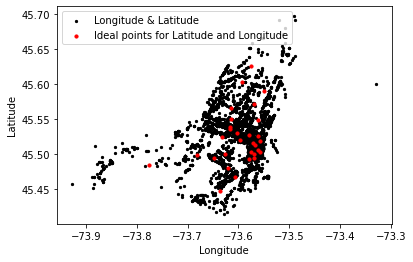

Ideal points for Longitude: [-73.59384676 -73.57966445 -73.61751979 -73.68220393 -73.5606486
 -73.6141812  -73.60717316 -73.57218222 -73.56906724 -73.56852171
 -73.55810095 -73.62665283 -73.61391628 -73.56750845 -73.56227949
 -73.63711211 -73.60265404 -73.57504686 -73.64821455 -73.77631043
 -73.63233555 -73.56205453 -73.54940209 -73.57029653 -73.59681312
 -73.57591534 -73.61715886 -73.55800101 -73.61977479 -73.5796605 ]
Ideal points for Latitude: [45.60244294 45.49267688 45.53837399 45.49913138 45.50570856 45.54967674
 45.46727823 45.51572615 45.57139467 45.50082467 45.51890239 45.50085552
 45.56559285 45.51311308 45.5267299  45.44810869 45.53034685 45.50322082
 45.49509017 45.48439112 45.52465014 45.54919166 45.58985614 45.49544277
 45.52097643 45.62572705 45.53651694 45.50377389 45.48051841 45.52806442]


In [194]:
plt.scatter(poi_dataset['X'],poi_dataset['Y'],c='black', label= 'Longitude & Latitude',s=5)
plt.scatter(poi_dataset_centroids[:, 0], poi_dataset_centroids[:, 1], c='red', label='Ideal points for Latitude and Longitude', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
print("Ideal points for Longitude:", poi_dataset_centroids[:, 0])
print("Ideal points for Latitude:", poi_dataset_centroids[:, 1])

Looking for ideal category value

In [195]:
category_mode = stats.mode(poi_dataset_centroids[:,-2])  # for CATEGORY values
# category_mode = np.median(poi_dataset_centroids[:,-2])  # for CATEGORY values

In [196]:
round(category_mode[0][0])
# category_mode

1

In [197]:
category_ideal = round(np.mean(poi_dataset_centroids[:,-2]))

In [198]:
resolved # Ideal category value 

[['RESTAURANT', 'Restaurants', 2],
 ['HOTEL', 'Hotels', 2],
 ['SHOPPING_CENTER', 'Shopping Center and Malls', 2],
 ['PAY_GARAGE', 'Parking ', 3],
 ['CAR_DEALER', 'Motor Vehicle Dealers', 4],
 ['REC_SPORTS_FACILITY', 'Amusement and Recreation Services', 5],
 ['HOSPITAL', 12],
 ['TRAVEL_CENTER', 3],
 ['OFFICE_BLDG', 3],
 ['OTHER', 15],
 ['GAS_STATION', 3],
 ['Not Available', 17],
 ['Bar', 18],
 ['Universities, and Colleges', 6],
 ['Museums and Art Galleries', 7],
 ['Movie Theaters', 8],
 ['Department Stores', 9],
 ['Furniture Stores', 10],
 ['Warehouse Stores', 11]]

Hotel and Shopping Center and Malls are the Ideal Category Value


In [199]:
postcode_mode = stats.mode(poi_dataset_centroids[:,-1]) # for POST_CODE values

In [200]:
round(postcode_mode[0][0])

40

In [201]:
postcode_ideal = round(np.mean(poi_dataset_centroids[:,-1]))

Ideal category values are mentioned below

In [202]:
# function to return key for any value
def get_key(val,my_dict):
    for key, value in my_dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [203]:
get_key(postcode_ideal,postcode_mapping) # Ideal post_code

'H2X 1R9'

In [204]:
get_key(round(postcode_mode[0][0]),postcode_mapping) # Ideal post_code

'H1E 3L1'

H2X 1P4 and H1A 0A1 are ideal post code values

In [205]:
#Most optimal values to install EV charging station

In [206]:
poi_dataset.columns

Index(['X', 'Y', 'CATEGORY', 'POST_CODE'], dtype='object')

In [207]:
census_1

,X,Y,2016 Population,2016 Dwelling Count,2016 Occupied Dwelling Count,Area (sq. km)
0,-74.01211,45.66353,50513,20395,19631,994.845387
1,-73.49604,45.54300,85721,34249,33257,92.228456
2,-73.49604,45.54300,41671,17134,16888,144.089454
3,-73.49604,45.54300,239700,110761,105533,235.667385
4,-73.49604,45.54300,26394,10418,10243,89.449089
5,-73.42399,45.83146,5913,2962,2878,4.751278
6,-73.42399,45.83146,3439,1494,1435,74.937797
7,-73.42399,45.83146,84285,33876,33321,127.932585
8,-73.42399,45.83146,22429,8932,8736,207.825104
9,-73.42399,45.83146,5493,2240,2166,4.908156


In [208]:
census_1.columns

Index(['X', 'Y', '2016 Population', '2016 Dwelling Count',
       '2016 Occupied Dwelling Count', 'Area (sq. km)'],
      dtype='object')

In [209]:
mon_dataset.columns

Index(['EV Level2 EVSE Num', 'EV DC Fast Count', 'Latitude', 'Longitude',
       'Facility Type', 'ZIP', 'EV Connector Types', 'Access Code'],
      dtype='object')

In [210]:
census_centroids[:,0].mean() , poi_dataset_centroids[:,0].mean() , montreal_centroids[:,3].mean()

(-73.60667616666666, -73.59980724525424, -73.61131139900611)

In [211]:
some_list = []
def ideal_points(start, stop, cen_col, poi_col, mon_col, label):
  if abs(start - stop) == 3:
    for i in range(start,stop):
      something = census_centroids[i,cen_col], poi_dataset_centroids[i,poi_col], montreal_centroids[i,mon_col]
      some_list.append(something)
    print("Ideal point on", label, np.mean(some_list))
    some_list.clear()
  else:
    raise ValueError("The value is not equal to 3. Value:", abs(start-stop))

Optimal values according to Longitude

In [212]:
label = 'longitude'
cen_col = 0
poi_col = 0
mon_col = 3
ideal_points(0,3,cen_col,poi_col,mon_col,label)     #1
ideal_points(3,6,cen_col,poi_col,mon_col,label)     #2
ideal_points(6,9,cen_col,poi_col,mon_col,label)     #3
ideal_points(9,12,cen_col,poi_col,mon_col,label)    #4
ideal_points(12,15,cen_col,poi_col,mon_col,label)   #5
ideal_points(15,18,cen_col,poi_col,mon_col,label)   #6
ideal_points(18,21,cen_col,poi_col,mon_col,label)   #7
ideal_points(21,24,cen_col,poi_col,mon_col,label)   #8
ideal_points(24,27,cen_col,poi_col,mon_col,label)   #9
ideal_points(27,30,cen_col,poi_col,mon_col,label)   #10

Ideal point on longitude -73.58046638835052
Ideal point on longitude -73.5689061350571
Ideal point on longitude -73.61859476931383
Ideal point on longitude -73.59522225621977
Ideal point on longitude -73.67724423816534
Ideal point on longitude -73.58839472714916
Ideal point on longitude -73.63673948535
Ideal point on longitude -73.61685611250239
Ideal point on longitude -73.58669358477573
Ideal point on longitude -73.59019833953948


Optimal values according to Latitude

In [213]:
label = 'latitude'
cen_col = 1
poi_col = 1
mon_col = 2
ideal_points(0,3,cen_col,poi_col,mon_col,label)     #1
ideal_points(3,6,cen_col,poi_col,mon_col,label)     #2
ideal_points(6,9,cen_col,poi_col,mon_col,label)     #3
ideal_points(9,12,cen_col,poi_col,mon_col,label)    #4
ideal_points(12,15,cen_col,poi_col,mon_col,label)   #5
ideal_points(15,18,cen_col,poi_col,mon_col,label)   #6
ideal_points(18,21,cen_col,poi_col,mon_col,label)   #7
ideal_points(21,24,cen_col,poi_col,mon_col,label)   #8
ideal_points(24,27,cen_col,poi_col,mon_col,label)   #9
ideal_points(27,30,cen_col,poi_col,mon_col,label)   #10

Ideal point on latitude 45.54361285868539
Ideal point on latitude 45.57555944413708
Ideal point on latitude 45.56876502683734
Ideal point on latitude 45.544411138906746
Ideal point on latitude 45.53777460135297
Ideal point on latitude 45.517359319462685
Ideal point on latitude 45.556471268322284
Ideal point on latitude 45.56955581438777
Ideal point on latitude 45.550510375429404
Ideal point on latitude 45.54893023314959


Merging points in an array (list)

In [214]:
longitude_list = []
for i in range(len(census_centroids)):
      something = census_centroids[i,0], poi_dataset_centroids[i,0], montreal_centroids[i,3]
      longitude_list.append(np.mean(something))

In [215]:
longitude_list

[-73.58260142628835,
 -73.52104443071828,
 -73.6377533080449,
 -73.57515978434643,
 -73.56904580206269,
 -73.56251281876217,
 -73.54544804463337,
 -73.74126034469658,
 -73.56907591861153,
 -73.56737331388784,
 -73.7114860340106,
 -73.5068074207609,
 -73.72817979295105,
 -73.56412702768888,
 -73.7394258938561,
 -73.56354049113177,
 -73.58073322940055,
 -73.6209104609152,
 -73.71916956893199,
 -73.58563937043188,
 -73.60540951668621,
 -73.60050612555763,
 -73.66721300679426,
 -73.58284920515531,
 -73.55789484999856,
 -73.62058086640606,
 -73.58160503792256,
 -73.53703101344416,
 -73.70853589383054,
 -73.52502811134377]

In [216]:
latitude_list = []
for i in range(len(census_centroids)):
      something = census_centroids[i,1], poi_dataset_centroids[i,1], montreal_centroids[i,2]
      latitude_list.append(np.mean(something))

In [217]:
latitude_list

[45.54827987114219,
 45.51813976760264,
 45.56441893731134,
 45.60451103773045,
 45.584775152553654,
 45.537392142127125,
 45.62547033121134,
 45.53748264419894,
 45.543342105101765,
 45.49923200485849,
 45.53691179070504,
 45.59708962115672,
 45.57416551209908,
 45.52058058005582,
 45.518577711903994,
 45.51347692704681,
 45.52609357546868,
 45.51250745587257,
 45.57534300789177,
 45.567049176522225,
 45.527021620552865,
 45.52436361952118,
 45.550708205771684,
 45.63359561787042,
 45.56939736835232,
 45.54207005697909,
 45.540063700956786,
 45.514377813934374,
 45.51184502396607,
 45.62056786154833]

Converting Latitude and Longitude to Postal Codes

In [218]:
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']

In [219]:
geolocator = geopy.Nominatim(user_agent='sheisomaima@gmail.com')

In [220]:
df = pd.DataFrame({
    'Lat': latitude_list,
    'Lon': longitude_list
})


In [221]:
zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat', lon_field='Lon')

In [222]:
zipcodes

0     H1Y 1W5
1     J4K 1A7
2     H2M 2M1
3     H1J 1G5
4     H1T 2L7
5     H2K 3E2
6     H1B 5Y3
7     H7V 2T2
8     H1Y 3J8
9     H3B 1R2
10    H4J 1Y4
11    H1L 3L2
12    H7S 1N2
13    H2L 1H8
14    H4K 1N4
15    H2X 1J2
16    H2J 1W9
17    H3S 1N8
18    H7M 5G4
19    H1T 1B6
20    H2T 2J1
21    H2T 2L1
22    H3L 2P5
23    H1E 5Y8
24    H1Y 2G3
25    H2P 1V6
26    H2H 2P9
27    H2L 5C1
28    H4R 3B1
29    H1L 6P2
dtype: object

In [223]:
len(zipcodes)

30

In [224]:
zipcode_list = []

In [225]:
zipcode_list.append([i for i in zipcodes])

In [226]:
zipcode_list

[['H1Y 1W5',
  'J4K 1A7',
  'H2M 2M1',
  'H1J 1G5',
  'H1T 2L7',
  'H2K 3E2',
  'H1B 5Y3',
  'H7V 2T2',
  'H1Y 3J8',
  'H3B 1R2',
  'H4J 1Y4',
  'H1L 3L2',
  'H7S 1N2',
  'H2L 1H8',
  'H4K 1N4',
  'H2X 1J2',
  'H2J 1W9',
  'H3S 1N8',
  'H7M 5G4',
  'H1T 1B6',
  'H2T 2J1',
  'H2T 2L1',
  'H3L 2P5',
  'H1E 5Y8',
  'H1Y 2G3',
  'H2P 1V6',
  'H2H 2P9',
  'H2L 5C1',
  'H4R 3B1',
  'H1L 6P2']]

In [227]:
len(zipcode_list)

1

In [228]:
zip_list = []
for i in zipcode_list:
  zip_list.append(i)

In [229]:
zip_list

[['H1Y 1W5',
  'J4K 1A7',
  'H2M 2M1',
  'H1J 1G5',
  'H1T 2L7',
  'H2K 3E2',
  'H1B 5Y3',
  'H7V 2T2',
  'H1Y 3J8',
  'H3B 1R2',
  'H4J 1Y4',
  'H1L 3L2',
  'H7S 1N2',
  'H2L 1H8',
  'H4K 1N4',
  'H2X 1J2',
  'H2J 1W9',
  'H3S 1N8',
  'H7M 5G4',
  'H1T 1B6',
  'H2T 2J1',
  'H2T 2L1',
  'H3L 2P5',
  'H1E 5Y8',
  'H1Y 2G3',
  'H2P 1V6',
  'H2H 2P9',
  'H2L 5C1',
  'H4R 3B1',
  'H1L 6P2']]

Taking out more information through postal code

In [230]:
nomi = pgeocode.Nominatim('ca')

In [231]:
nomi.query_postal_code("H4C 1R6")

postal_code               H4C
country_code               CA
place_name        Saint-Henri
state_name             Quebec
state_code                 QC
county_name               NaN
county_code               NaN
community_name            NaN
community_code            NaN
latitude              45.4737
longitude            -73.5882
accuracy                    4
Name: 0, dtype: object

In [232]:
nomi.query_postal_code(i for i in zipcodes)

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,H1Y,CA,Rosemont South,Quebec,QC,Rosemont,NaN,NaN,NaN,45.5486,-73.5788,1.0
1,J4K,CA,Longueuil Southwest,Quebec,QC,Longueuil,NaN,NaN,NaN,45.5183,-73.5023,1.0
2,H2M,CA,Ahuntsic East,Quebec,QC,Ahuntsic,NaN,NaN,NaN,45.5528,-73.6411,6.0
3,H1J,CA,Anjou West,Quebec,QC,Anjou,NaN,NaN,NaN,45.6097,-73.5794,1.0
4,H1T,CA,Rosemont North,Quebec,QC,Rosemont,NaN,NaN,NaN,45.5730,-73.5701,1.0
5,H2K,CA,Centre-Sud North,Quebec,QC,NaN,NaN,NaN,NaN,45.5307,-73.5547,6.0
6,H1B,CA,Montreal East,Quebec,QC,Montreal,6.0,NaN,NaN,45.6320,-73.5075,4.0
7,H7V,CA,Chomedey East,Quebec,QC,Chomedey,NaN,NaN,NaN,45.5478,-73.7368,1.0
8,H1Y,CA,Rosemont South,Quebec,QC,Rosemont,NaN,NaN,NaN,45.5486,-73.5788,1.0
9,H3B,CA,Downtown Montreal East,Quebec,QC,Montreal,6.0,NaN,NaN,45.5005,-73.5684,1.0


In [233]:
#Predicting points on Maps

In [234]:
import folium
from folium.plugins import MarkerCluster

In [235]:
montreal_map = folium.Map(location=[45.5017,-73.5673],zoom_start=13)

In [236]:
montreal_map

In [237]:
for i in range(len(zipcodes)):
  folium.Marker([df['Lat'][i],df['Lon'][i]],popup=zipcodes[i]).add_to(montreal_map)
montreal_map

In [238]:
#Report

Applied Kmeans clustering on all three datasets to find most optimal (ideal) values based on locations (Latitude and Longitude) according to the population density and type of building (movie theater, hotel, etc)

First, all the datasets are analyzed based on name of the columns, the shape (the no. of rows and columns) and the type of values that each of the columns of the dataset has.

Then, all the datasets are analyzed according to null/nan values, filtered all the columns that had all the null/nan values, skipping those that had some values non-null, and then filling nan values with their corresponding median and mean values by looking at the pattern of the values.

Then all the values are visualized according to the other group columns in search of patterns/data insights.

Then after all visualizations (through code), applied Kmeans clustering by specifiying most optimal number of cluster values by using elbow method.

Finally Kmeans clustering is applied on each dataset and visualized optimal values and values from the dataset accordingly using 'matplotlib.pyplot'.

The most optimal values for location for EV charging station is found to be (from all the datasets) are:

From points of interest Dataset
Ideal points for Longitude: [-73.5976752  -73.60119506]
Ideal points for Latitude: [45.52238761 45.51934667]

From census Dataset
Ideal points for Longitude: [-73.61785694 -73.55469]
Ideal points for Latitude: [45.58165611 45.5124]

From montreal Dataset
Ideal points for Latitude: [45.55022957 45.52783595]
Ideal points for Longitude: [-73.61476395 -73.64194344]


By looking at the above data, it is found that by taking average (mean) of all values respective to all three datasets (of Latitude and Longitude), we can find out most optimal location of placing EV charging station respected to all three scenarios (population density, area, facility type).

So by taking mean of all values of latitude and longitude of each dataset, we find 10 optimal values accordingly where EV charging station can be installed. 

Ideal point on longitude -73.58305731866056
Ideal point on longitude -73.57660915704307
Ideal point on longitude -73.59760213234239
Ideal point on longitude -73.56862620155522
Ideal point on longitude -73.61611168733462
Ideal point on longitude -73.692421128523
Ideal point on longitude -73.63749460346585
Ideal point on longitude -73.60913821496884
Ideal point on longitude -73.61101125578311
Ideal point on longitude -73.58208479088935


Ideal point on latitude 45.515406206710445
Ideal point on latitude 45.56135744266136
Ideal point on latitude 45.55216217752644
Ideal point on latitude 45.55634395157733
Ideal point on latitude 45.576073368921705
Ideal point on latitude 45.54752586627766
Ideal point on latitude 45.54690870646192
Ideal point on latitude 45.52348755519236
Ideal point on latitude 45.554318728983816
Ideal point on latitude 45.58026262372032

Furthermore, all other relations are described in above code as well for optimal location according to area, population density and facility type.

Also points are visualized according to postal codes on the map using mplleaflet library for python, by converting latitude and longitude points to postal codes.

Upon finding, we got ideal category `Hotel` and `Shopping Centers and Malls`

`Shopping Centers and Malls` is ideal point because this is the place that people usually visit, for more than 3 hours, and EV cars can charge fully upto that period.

`Hotels` is the second best ideal point since people are populated there more than any place.

Ideal Zipcode is found to be `H1E 3L1` and `H1A 0A1` based on population densty (dwelling count), area, and facility type.

Ideal `EV Level2 EVSE Num` is found to be `2` and `EV DC Fast Count` is `1`